# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [31]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

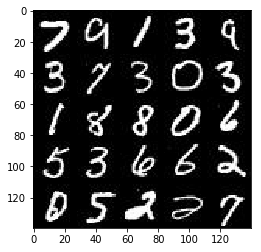

In [32]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

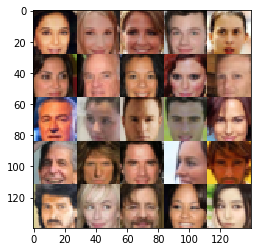

In [33]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [35]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], "input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], "input_z")
    learning_rate = tf.placeholder(tf.float32, None, "learning_rate")

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [36]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.layers.batch_normalization(h1, training=True)
        h1 = tf.maximum(alpha * h1, h1)
        h1 = tf.layers.dropout(h1, 0.75)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        h2 = tf.layers.dropout(h2, 0.75)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        h3 = tf.layers.dropout(h3, 0.75)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [38]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
        h1 = tf.layers.dropout(h1, 0.75)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
        h2 = tf.layers.dropout(h2, 0.75)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
        h3 = tf.layers.dropout(h3, 0.75)
        
        h4 = tf.layers.conv2d_transpose(h3, 64, 5, 1, 'same')
        h4 = tf.layers.batch_normalization(h4, training=is_train)
        h4 = tf.maximum(alpha * h4, h4)
        h4 = tf.layers.dropout(h4, 0.75)
        
        h5 = tf.layers.conv2d_transpose(h4, 64, 5, 1, 'same')
        h5 = tf.layers.batch_normalization(h5, training=is_train)
        h5 = tf.maximum(alpha * h5, h5)
        h5 = tf.layers.dropout(h5, 0.75)
    
        logits = tf.layers.conv2d_transpose(h5, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [39]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [40]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        t_vars = tf.trainable_variables()
        
        d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
        g_vars = [var for var in t_vars if var.name.startswith('generator')]

        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [42]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 3.1584... Generator Loss: 0.1385
Epoch 1/2... Batch 20... Discriminator Loss: 1.5791... Generator Loss: 0.8046
Epoch 1/2... Batch 30... Discriminator Loss: 3.0969... Generator Loss: 0.4041
Epoch 1/2... Batch 40... Discriminator Loss: 1.9681... Generator Loss: 0.9105
Epoch 1/2... Batch 50... Discriminator Loss: 1.7131... Generator Loss: 0.7877
Epoch 1/2... Batch 60... Discriminator Loss: 1.2374... Generator Loss: 1.5333
Epoch 1/2... Batch 70... Discriminator Loss: 1.0807... Generator Loss: 1.5180
Epoch 1/2... Batch 80... Discriminator Loss: 1.0858... Generator Loss: 1.0527
Epoch 1/2... Batch 90... Discriminator Loss: 0.7159... Generator Loss: 2.3162
Epoch 1/2... Batch 100... Discriminator Loss: 1.0059... Generator Loss: 1.1526


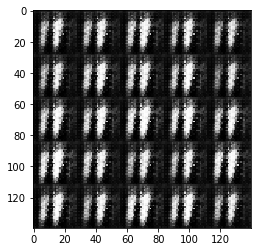

Epoch 1/2... Batch 110... Discriminator Loss: 1.1817... Generator Loss: 1.2874
Epoch 1/2... Batch 120... Discriminator Loss: 1.0030... Generator Loss: 1.2221
Epoch 1/2... Batch 130... Discriminator Loss: 1.1962... Generator Loss: 0.9517
Epoch 1/2... Batch 140... Discriminator Loss: 1.1562... Generator Loss: 0.9282
Epoch 1/2... Batch 150... Discriminator Loss: 1.3496... Generator Loss: 1.4809
Epoch 1/2... Batch 160... Discriminator Loss: 1.3678... Generator Loss: 1.3249
Epoch 1/2... Batch 170... Discriminator Loss: 1.3230... Generator Loss: 0.9824
Epoch 1/2... Batch 180... Discriminator Loss: 1.1284... Generator Loss: 1.6997
Epoch 1/2... Batch 190... Discriminator Loss: 1.1539... Generator Loss: 1.1189
Epoch 1/2... Batch 200... Discriminator Loss: 1.2525... Generator Loss: 0.9991


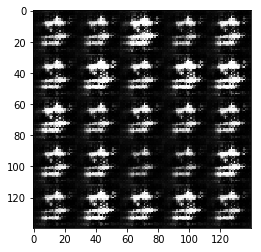

Epoch 1/2... Batch 210... Discriminator Loss: 1.5150... Generator Loss: 1.2065
Epoch 1/2... Batch 220... Discriminator Loss: 1.0709... Generator Loss: 1.0174
Epoch 1/2... Batch 230... Discriminator Loss: 0.9299... Generator Loss: 1.3024
Epoch 1/2... Batch 240... Discriminator Loss: 0.7848... Generator Loss: 1.7614
Epoch 1/2... Batch 250... Discriminator Loss: 1.4019... Generator Loss: 0.7828
Epoch 1/2... Batch 260... Discriminator Loss: 0.8058... Generator Loss: 1.5944
Epoch 1/2... Batch 270... Discriminator Loss: 0.5735... Generator Loss: 1.9568
Epoch 1/2... Batch 280... Discriminator Loss: 0.9492... Generator Loss: 1.3798
Epoch 1/2... Batch 290... Discriminator Loss: 1.0059... Generator Loss: 1.3884
Epoch 1/2... Batch 300... Discriminator Loss: 0.5113... Generator Loss: 2.2884


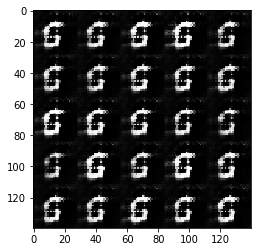

Epoch 1/2... Batch 310... Discriminator Loss: 0.8951... Generator Loss: 1.1820
Epoch 1/2... Batch 320... Discriminator Loss: 1.4037... Generator Loss: 2.5371
Epoch 1/2... Batch 330... Discriminator Loss: 0.7392... Generator Loss: 2.0695
Epoch 1/2... Batch 340... Discriminator Loss: 0.7015... Generator Loss: 1.5803
Epoch 1/2... Batch 350... Discriminator Loss: 0.6754... Generator Loss: 1.8838
Epoch 1/2... Batch 360... Discriminator Loss: 0.8886... Generator Loss: 1.5332
Epoch 1/2... Batch 370... Discriminator Loss: 0.6815... Generator Loss: 2.2992
Epoch 1/2... Batch 380... Discriminator Loss: 0.8313... Generator Loss: 1.4671
Epoch 1/2... Batch 390... Discriminator Loss: 0.9570... Generator Loss: 1.3851
Epoch 1/2... Batch 400... Discriminator Loss: 0.7084... Generator Loss: 1.8378


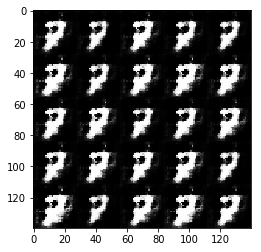

Epoch 1/2... Batch 410... Discriminator Loss: 1.0706... Generator Loss: 1.0322
Epoch 1/2... Batch 420... Discriminator Loss: 0.6666... Generator Loss: 2.0441
Epoch 1/2... Batch 430... Discriminator Loss: 0.5750... Generator Loss: 2.1335
Epoch 1/2... Batch 440... Discriminator Loss: 0.5861... Generator Loss: 2.0402
Epoch 1/2... Batch 450... Discriminator Loss: 0.5080... Generator Loss: 4.1704
Epoch 1/2... Batch 460... Discriminator Loss: 0.8917... Generator Loss: 1.1441
Epoch 1/2... Batch 470... Discriminator Loss: 0.7136... Generator Loss: 1.7447
Epoch 1/2... Batch 480... Discriminator Loss: 0.5720... Generator Loss: 2.0607
Epoch 1/2... Batch 490... Discriminator Loss: 0.7636... Generator Loss: 2.0158
Epoch 1/2... Batch 500... Discriminator Loss: 1.0168... Generator Loss: 0.8258


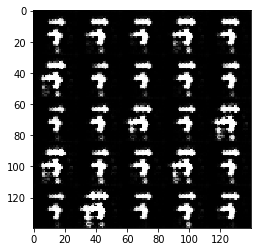

Epoch 1/2... Batch 510... Discriminator Loss: 0.9444... Generator Loss: 1.5310
Epoch 1/2... Batch 520... Discriminator Loss: 0.5944... Generator Loss: 1.8319
Epoch 1/2... Batch 530... Discriminator Loss: 0.5756... Generator Loss: 2.0877
Epoch 1/2... Batch 540... Discriminator Loss: 0.6162... Generator Loss: 2.1305
Epoch 1/2... Batch 550... Discriminator Loss: 1.0469... Generator Loss: 1.2462
Epoch 1/2... Batch 560... Discriminator Loss: 0.5221... Generator Loss: 2.6926
Epoch 1/2... Batch 570... Discriminator Loss: 0.5774... Generator Loss: 2.2598
Epoch 1/2... Batch 580... Discriminator Loss: 0.6040... Generator Loss: 2.3415
Epoch 1/2... Batch 590... Discriminator Loss: 0.6857... Generator Loss: 1.5299
Epoch 1/2... Batch 600... Discriminator Loss: 0.7142... Generator Loss: 1.7409


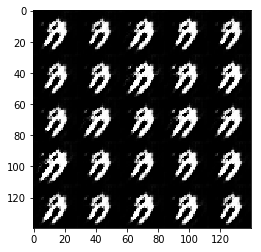

Epoch 1/2... Batch 610... Discriminator Loss: 0.5319... Generator Loss: 2.3945
Epoch 1/2... Batch 620... Discriminator Loss: 0.6280... Generator Loss: 2.0411
Epoch 1/2... Batch 630... Discriminator Loss: 0.8440... Generator Loss: 2.1504
Epoch 1/2... Batch 640... Discriminator Loss: 1.5379... Generator Loss: 0.7908
Epoch 1/2... Batch 650... Discriminator Loss: 0.9392... Generator Loss: 1.2050
Epoch 1/2... Batch 660... Discriminator Loss: 1.6078... Generator Loss: 0.6391
Epoch 1/2... Batch 670... Discriminator Loss: 1.1233... Generator Loss: 0.9818
Epoch 1/2... Batch 680... Discriminator Loss: 0.8538... Generator Loss: 1.1375
Epoch 1/2... Batch 690... Discriminator Loss: 0.6609... Generator Loss: 1.8044
Epoch 1/2... Batch 700... Discriminator Loss: 1.1832... Generator Loss: 1.3324


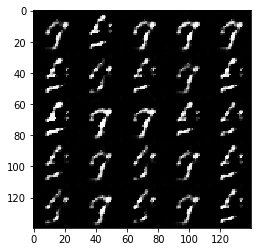

Epoch 1/2... Batch 710... Discriminator Loss: 1.4633... Generator Loss: 0.8224
Epoch 1/2... Batch 720... Discriminator Loss: 1.1723... Generator Loss: 0.7168
Epoch 1/2... Batch 730... Discriminator Loss: 1.2847... Generator Loss: 1.6828
Epoch 1/2... Batch 740... Discriminator Loss: 1.0468... Generator Loss: 1.3423
Epoch 1/2... Batch 750... Discriminator Loss: 0.8422... Generator Loss: 1.6503
Epoch 1/2... Batch 760... Discriminator Loss: 1.3043... Generator Loss: 0.9375
Epoch 1/2... Batch 770... Discriminator Loss: 0.7401... Generator Loss: 1.8712
Epoch 1/2... Batch 780... Discriminator Loss: 1.2444... Generator Loss: 0.7336
Epoch 1/2... Batch 790... Discriminator Loss: 0.7832... Generator Loss: 1.7932
Epoch 1/2... Batch 800... Discriminator Loss: 0.7306... Generator Loss: 1.8401


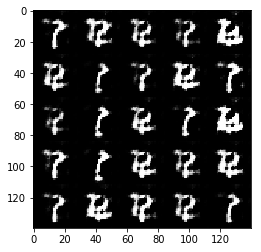

Epoch 1/2... Batch 810... Discriminator Loss: 1.1886... Generator Loss: 0.7408
Epoch 1/2... Batch 820... Discriminator Loss: 1.4505... Generator Loss: 1.3136
Epoch 1/2... Batch 830... Discriminator Loss: 0.8206... Generator Loss: 1.5518
Epoch 1/2... Batch 840... Discriminator Loss: 0.9863... Generator Loss: 1.3721
Epoch 1/2... Batch 850... Discriminator Loss: 0.9722... Generator Loss: 1.2902
Epoch 1/2... Batch 860... Discriminator Loss: 1.0466... Generator Loss: 1.1471
Epoch 1/2... Batch 870... Discriminator Loss: 1.2140... Generator Loss: 1.6004
Epoch 1/2... Batch 880... Discriminator Loss: 0.9792... Generator Loss: 1.3582
Epoch 1/2... Batch 890... Discriminator Loss: 0.8389... Generator Loss: 1.7438
Epoch 1/2... Batch 900... Discriminator Loss: 0.7312... Generator Loss: 1.9218


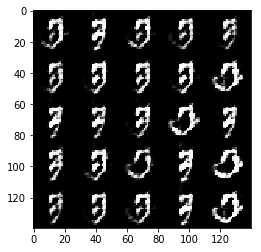

Epoch 1/2... Batch 910... Discriminator Loss: 1.1098... Generator Loss: 0.9954
Epoch 1/2... Batch 920... Discriminator Loss: 0.9899... Generator Loss: 1.0341
Epoch 1/2... Batch 930... Discriminator Loss: 1.1532... Generator Loss: 0.9765
Epoch 1/2... Batch 940... Discriminator Loss: 1.2734... Generator Loss: 0.8652
Epoch 1/2... Batch 950... Discriminator Loss: 1.1292... Generator Loss: 1.1413
Epoch 1/2... Batch 960... Discriminator Loss: 1.1093... Generator Loss: 1.5403
Epoch 1/2... Batch 970... Discriminator Loss: 1.4836... Generator Loss: 0.6133
Epoch 1/2... Batch 980... Discriminator Loss: 0.9990... Generator Loss: 0.9993
Epoch 1/2... Batch 990... Discriminator Loss: 1.1387... Generator Loss: 0.8837
Epoch 1/2... Batch 1000... Discriminator Loss: 1.1826... Generator Loss: 0.6706


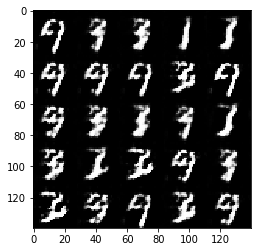

Epoch 1/2... Batch 1010... Discriminator Loss: 1.3231... Generator Loss: 0.9750
Epoch 1/2... Batch 1020... Discriminator Loss: 1.0896... Generator Loss: 1.2481
Epoch 1/2... Batch 1030... Discriminator Loss: 1.2030... Generator Loss: 0.7770
Epoch 1/2... Batch 1040... Discriminator Loss: 1.0160... Generator Loss: 0.9322
Epoch 1/2... Batch 1050... Discriminator Loss: 1.3583... Generator Loss: 1.3901
Epoch 1/2... Batch 1060... Discriminator Loss: 1.2927... Generator Loss: 1.0121
Epoch 1/2... Batch 1070... Discriminator Loss: 1.4581... Generator Loss: 0.6069
Epoch 1/2... Batch 1080... Discriminator Loss: 1.4952... Generator Loss: 0.6726
Epoch 1/2... Batch 1090... Discriminator Loss: 1.3950... Generator Loss: 0.9920
Epoch 1/2... Batch 1100... Discriminator Loss: 1.0594... Generator Loss: 0.9664


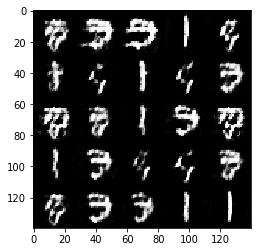

Epoch 1/2... Batch 1110... Discriminator Loss: 1.4334... Generator Loss: 0.6387
Epoch 1/2... Batch 1120... Discriminator Loss: 0.8492... Generator Loss: 2.1021
Epoch 1/2... Batch 1130... Discriminator Loss: 1.1381... Generator Loss: 0.9222
Epoch 1/2... Batch 1140... Discriminator Loss: 1.1224... Generator Loss: 1.1380
Epoch 1/2... Batch 1150... Discriminator Loss: 1.0606... Generator Loss: 0.9727
Epoch 1/2... Batch 1160... Discriminator Loss: 1.2303... Generator Loss: 0.7380
Epoch 1/2... Batch 1170... Discriminator Loss: 1.1316... Generator Loss: 1.2426
Epoch 1/2... Batch 1180... Discriminator Loss: 0.9888... Generator Loss: 1.4587
Epoch 1/2... Batch 1190... Discriminator Loss: 0.9317... Generator Loss: 1.4066
Epoch 1/2... Batch 1200... Discriminator Loss: 0.9604... Generator Loss: 1.9336


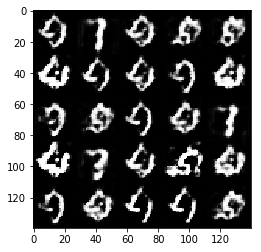

Epoch 1/2... Batch 1210... Discriminator Loss: 1.0601... Generator Loss: 0.8402
Epoch 1/2... Batch 1220... Discriminator Loss: 1.4845... Generator Loss: 0.8816
Epoch 1/2... Batch 1230... Discriminator Loss: 1.0934... Generator Loss: 1.6626
Epoch 1/2... Batch 1240... Discriminator Loss: 0.8731... Generator Loss: 1.5419
Epoch 1/2... Batch 1250... Discriminator Loss: 1.5860... Generator Loss: 0.4466
Epoch 1/2... Batch 1260... Discriminator Loss: 0.9770... Generator Loss: 1.5674
Epoch 1/2... Batch 1270... Discriminator Loss: 0.9513... Generator Loss: 1.5037
Epoch 1/2... Batch 1280... Discriminator Loss: 1.1629... Generator Loss: 1.0631
Epoch 1/2... Batch 1290... Discriminator Loss: 1.1864... Generator Loss: 0.8331
Epoch 1/2... Batch 1300... Discriminator Loss: 1.0670... Generator Loss: 1.1929


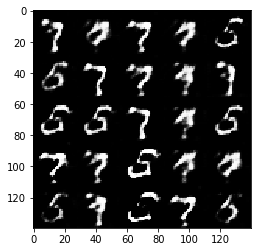

Epoch 1/2... Batch 1310... Discriminator Loss: 1.0376... Generator Loss: 1.0834
Epoch 1/2... Batch 1320... Discriminator Loss: 0.8964... Generator Loss: 1.3444
Epoch 1/2... Batch 1330... Discriminator Loss: 1.0736... Generator Loss: 0.9712
Epoch 1/2... Batch 1340... Discriminator Loss: 1.1775... Generator Loss: 0.8643
Epoch 1/2... Batch 1350... Discriminator Loss: 1.5058... Generator Loss: 0.4567
Epoch 1/2... Batch 1360... Discriminator Loss: 1.3300... Generator Loss: 0.7294
Epoch 1/2... Batch 1370... Discriminator Loss: 0.8964... Generator Loss: 1.5995
Epoch 1/2... Batch 1380... Discriminator Loss: 1.5691... Generator Loss: 0.5322
Epoch 1/2... Batch 1390... Discriminator Loss: 1.5301... Generator Loss: 0.4587
Epoch 1/2... Batch 1400... Discriminator Loss: 1.0912... Generator Loss: 1.0975


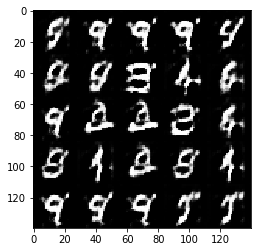

Epoch 1/2... Batch 1410... Discriminator Loss: 1.0826... Generator Loss: 1.0676
Epoch 1/2... Batch 1420... Discriminator Loss: 0.9754... Generator Loss: 1.3882
Epoch 1/2... Batch 1430... Discriminator Loss: 1.0958... Generator Loss: 0.9579
Epoch 1/2... Batch 1440... Discriminator Loss: 1.0349... Generator Loss: 1.1738
Epoch 1/2... Batch 1450... Discriminator Loss: 1.6658... Generator Loss: 0.3902
Epoch 1/2... Batch 1460... Discriminator Loss: 0.9509... Generator Loss: 1.3989
Epoch 1/2... Batch 1470... Discriminator Loss: 0.8375... Generator Loss: 1.7421
Epoch 1/2... Batch 1480... Discriminator Loss: 1.3097... Generator Loss: 1.2149
Epoch 1/2... Batch 1490... Discriminator Loss: 1.1045... Generator Loss: 0.9646
Epoch 1/2... Batch 1500... Discriminator Loss: 0.8451... Generator Loss: 1.5098


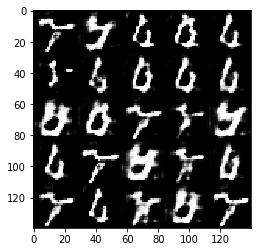

Epoch 1/2... Batch 1510... Discriminator Loss: 1.0666... Generator Loss: 1.3308
Epoch 1/2... Batch 1520... Discriminator Loss: 1.1593... Generator Loss: 0.9951
Epoch 1/2... Batch 1530... Discriminator Loss: 1.0170... Generator Loss: 0.9450
Epoch 1/2... Batch 1540... Discriminator Loss: 0.9621... Generator Loss: 1.6241
Epoch 1/2... Batch 1550... Discriminator Loss: 1.1445... Generator Loss: 0.9692
Epoch 1/2... Batch 1560... Discriminator Loss: 0.8241... Generator Loss: 1.4764
Epoch 1/2... Batch 1570... Discriminator Loss: 1.1006... Generator Loss: 1.0234
Epoch 1/2... Batch 1580... Discriminator Loss: 1.4843... Generator Loss: 0.6834
Epoch 1/2... Batch 1590... Discriminator Loss: 1.1180... Generator Loss: 1.1019
Epoch 1/2... Batch 1600... Discriminator Loss: 0.9586... Generator Loss: 1.4298


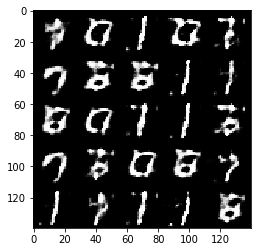

Epoch 1/2... Batch 1610... Discriminator Loss: 1.1184... Generator Loss: 0.8950
Epoch 1/2... Batch 1620... Discriminator Loss: 1.2785... Generator Loss: 0.8077
Epoch 1/2... Batch 1630... Discriminator Loss: 1.1682... Generator Loss: 0.8804
Epoch 1/2... Batch 1640... Discriminator Loss: 1.1462... Generator Loss: 1.2074
Epoch 1/2... Batch 1650... Discriminator Loss: 1.0239... Generator Loss: 1.8838
Epoch 1/2... Batch 1660... Discriminator Loss: 0.8638... Generator Loss: 1.6294
Epoch 1/2... Batch 1670... Discriminator Loss: 1.0136... Generator Loss: 0.9926
Epoch 1/2... Batch 1680... Discriminator Loss: 1.2183... Generator Loss: 0.8550
Epoch 1/2... Batch 1690... Discriminator Loss: 1.0891... Generator Loss: 1.5825
Epoch 1/2... Batch 1700... Discriminator Loss: 0.9523... Generator Loss: 1.0846


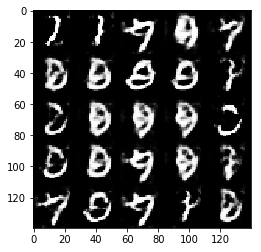

Epoch 1/2... Batch 1710... Discriminator Loss: 1.1723... Generator Loss: 1.5352
Epoch 1/2... Batch 1720... Discriminator Loss: 0.9195... Generator Loss: 2.0396
Epoch 1/2... Batch 1730... Discriminator Loss: 1.1547... Generator Loss: 2.5190
Epoch 1/2... Batch 1740... Discriminator Loss: 0.6768... Generator Loss: 2.1330
Epoch 1/2... Batch 1750... Discriminator Loss: 1.0355... Generator Loss: 1.8050
Epoch 1/2... Batch 1760... Discriminator Loss: 1.2124... Generator Loss: 0.8241
Epoch 1/2... Batch 1770... Discriminator Loss: 0.8964... Generator Loss: 1.8685
Epoch 1/2... Batch 1780... Discriminator Loss: 1.1649... Generator Loss: 0.7203
Epoch 1/2... Batch 1790... Discriminator Loss: 1.2055... Generator Loss: 1.9304
Epoch 1/2... Batch 1800... Discriminator Loss: 0.9798... Generator Loss: 0.9704


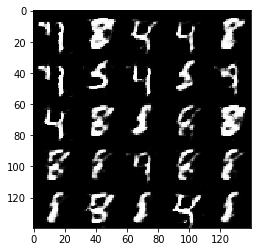

Epoch 1/2... Batch 1810... Discriminator Loss: 0.7326... Generator Loss: 1.8172
Epoch 1/2... Batch 1820... Discriminator Loss: 1.1367... Generator Loss: 0.8333
Epoch 1/2... Batch 1830... Discriminator Loss: 1.2923... Generator Loss: 2.0317
Epoch 1/2... Batch 1840... Discriminator Loss: 0.7721... Generator Loss: 1.4166
Epoch 1/2... Batch 1850... Discriminator Loss: 0.8836... Generator Loss: 1.5401
Epoch 1/2... Batch 1860... Discriminator Loss: 1.2060... Generator Loss: 0.8635
Epoch 1/2... Batch 1870... Discriminator Loss: 1.1327... Generator Loss: 1.4258
Epoch 2/2... Batch 10... Discriminator Loss: 1.4360... Generator Loss: 0.6461
Epoch 2/2... Batch 20... Discriminator Loss: 0.9911... Generator Loss: 1.1467
Epoch 2/2... Batch 30... Discriminator Loss: 1.0610... Generator Loss: 1.3640
Epoch 2/2... Batch 40... Discriminator Loss: 1.0141... Generator Loss: 1.4056
Epoch 2/2... Batch 50... Discriminator Loss: 0.7646... Generator Loss: 1.5058
Epoch 2/2... Batch 60... Discriminator Loss: 0.827

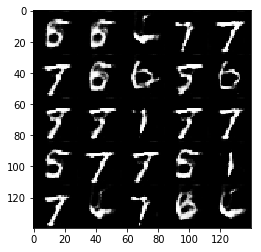

Epoch 2/2... Batch 110... Discriminator Loss: 1.2088... Generator Loss: 0.8837
Epoch 2/2... Batch 120... Discriminator Loss: 1.2828... Generator Loss: 0.8367
Epoch 2/2... Batch 130... Discriminator Loss: 1.2505... Generator Loss: 0.6059
Epoch 2/2... Batch 140... Discriminator Loss: 0.9884... Generator Loss: 1.2866
Epoch 2/2... Batch 150... Discriminator Loss: 0.9806... Generator Loss: 1.3798
Epoch 2/2... Batch 160... Discriminator Loss: 1.1937... Generator Loss: 1.2553
Epoch 2/2... Batch 170... Discriminator Loss: 1.0558... Generator Loss: 0.9625
Epoch 2/2... Batch 180... Discriminator Loss: 0.8950... Generator Loss: 1.8297
Epoch 2/2... Batch 190... Discriminator Loss: 0.8374... Generator Loss: 1.3699
Epoch 2/2... Batch 200... Discriminator Loss: 0.9722... Generator Loss: 0.9295


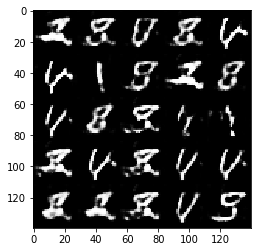

Epoch 2/2... Batch 210... Discriminator Loss: 0.8578... Generator Loss: 1.7331
Epoch 2/2... Batch 220... Discriminator Loss: 1.3305... Generator Loss: 0.7365
Epoch 2/2... Batch 230... Discriminator Loss: 0.9447... Generator Loss: 1.2613
Epoch 2/2... Batch 240... Discriminator Loss: 0.9973... Generator Loss: 1.2657
Epoch 2/2... Batch 250... Discriminator Loss: 1.0733... Generator Loss: 1.0626
Epoch 2/2... Batch 260... Discriminator Loss: 1.0515... Generator Loss: 0.8370
Epoch 2/2... Batch 270... Discriminator Loss: 1.0502... Generator Loss: 1.8409
Epoch 2/2... Batch 280... Discriminator Loss: 1.1001... Generator Loss: 0.8940
Epoch 2/2... Batch 290... Discriminator Loss: 1.2689... Generator Loss: 0.7490
Epoch 2/2... Batch 300... Discriminator Loss: 1.1660... Generator Loss: 0.7424


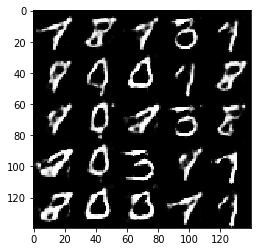

Epoch 2/2... Batch 310... Discriminator Loss: 1.2597... Generator Loss: 0.5900
Epoch 2/2... Batch 320... Discriminator Loss: 1.4362... Generator Loss: 0.7462
Epoch 2/2... Batch 330... Discriminator Loss: 1.1382... Generator Loss: 0.8887
Epoch 2/2... Batch 340... Discriminator Loss: 1.3156... Generator Loss: 0.9836
Epoch 2/2... Batch 350... Discriminator Loss: 1.1863... Generator Loss: 1.1138
Epoch 2/2... Batch 360... Discriminator Loss: 1.3038... Generator Loss: 0.8052
Epoch 2/2... Batch 370... Discriminator Loss: 1.0022... Generator Loss: 1.2570
Epoch 2/2... Batch 380... Discriminator Loss: 1.5185... Generator Loss: 0.6466
Epoch 2/2... Batch 390... Discriminator Loss: 1.2831... Generator Loss: 1.0109
Epoch 2/2... Batch 400... Discriminator Loss: 1.5009... Generator Loss: 0.5739


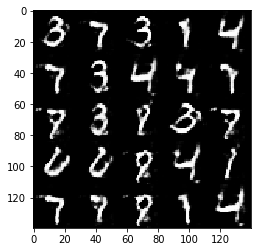

Epoch 2/2... Batch 410... Discriminator Loss: 1.5572... Generator Loss: 0.5316
Epoch 2/2... Batch 420... Discriminator Loss: 1.3698... Generator Loss: 0.6560
Epoch 2/2... Batch 430... Discriminator Loss: 1.1342... Generator Loss: 1.2388
Epoch 2/2... Batch 440... Discriminator Loss: 1.2808... Generator Loss: 0.7306
Epoch 2/2... Batch 450... Discriminator Loss: 1.0393... Generator Loss: 1.3908
Epoch 2/2... Batch 460... Discriminator Loss: 0.9679... Generator Loss: 1.7914
Epoch 2/2... Batch 470... Discriminator Loss: 1.3134... Generator Loss: 0.7759
Epoch 2/2... Batch 480... Discriminator Loss: 1.0869... Generator Loss: 1.0334
Epoch 2/2... Batch 490... Discriminator Loss: 1.0353... Generator Loss: 1.6113
Epoch 2/2... Batch 500... Discriminator Loss: 1.3629... Generator Loss: 0.5986


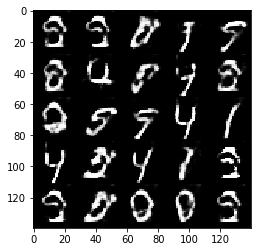

Epoch 2/2... Batch 510... Discriminator Loss: 1.1481... Generator Loss: 1.6549
Epoch 2/2... Batch 520... Discriminator Loss: 1.1788... Generator Loss: 0.7407
Epoch 2/2... Batch 530... Discriminator Loss: 1.5401... Generator Loss: 0.4352
Epoch 2/2... Batch 540... Discriminator Loss: 1.0542... Generator Loss: 1.2879
Epoch 2/2... Batch 550... Discriminator Loss: 1.4112... Generator Loss: 0.6350
Epoch 2/2... Batch 560... Discriminator Loss: 1.1571... Generator Loss: 1.3433
Epoch 2/2... Batch 570... Discriminator Loss: 1.2460... Generator Loss: 0.9377
Epoch 2/2... Batch 580... Discriminator Loss: 1.4062... Generator Loss: 0.6120
Epoch 2/2... Batch 590... Discriminator Loss: 1.2029... Generator Loss: 0.7299
Epoch 2/2... Batch 600... Discriminator Loss: 1.2314... Generator Loss: 0.8295


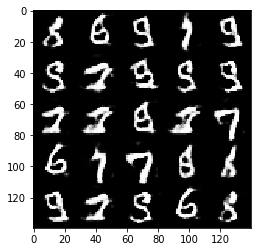

Epoch 2/2... Batch 610... Discriminator Loss: 1.2601... Generator Loss: 0.9285
Epoch 2/2... Batch 620... Discriminator Loss: 1.6248... Generator Loss: 0.4659
Epoch 2/2... Batch 630... Discriminator Loss: 1.3026... Generator Loss: 0.7686
Epoch 2/2... Batch 640... Discriminator Loss: 1.2673... Generator Loss: 0.9643
Epoch 2/2... Batch 650... Discriminator Loss: 1.3903... Generator Loss: 0.5527
Epoch 2/2... Batch 660... Discriminator Loss: 1.0821... Generator Loss: 1.1153
Epoch 2/2... Batch 670... Discriminator Loss: 1.2871... Generator Loss: 1.2434
Epoch 2/2... Batch 680... Discriminator Loss: 1.3104... Generator Loss: 1.4591
Epoch 2/2... Batch 690... Discriminator Loss: 1.3602... Generator Loss: 0.7302
Epoch 2/2... Batch 700... Discriminator Loss: 1.4522... Generator Loss: 1.3582


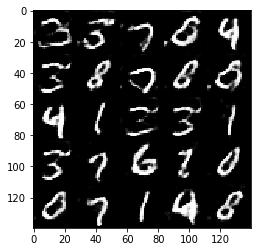

Epoch 2/2... Batch 710... Discriminator Loss: 1.1948... Generator Loss: 1.1902
Epoch 2/2... Batch 720... Discriminator Loss: 1.4767... Generator Loss: 0.4800
Epoch 2/2... Batch 730... Discriminator Loss: 1.1819... Generator Loss: 1.8045
Epoch 2/2... Batch 740... Discriminator Loss: 1.4584... Generator Loss: 1.1090
Epoch 2/2... Batch 750... Discriminator Loss: 1.0869... Generator Loss: 0.9153
Epoch 2/2... Batch 760... Discriminator Loss: 1.3524... Generator Loss: 0.8081
Epoch 2/2... Batch 770... Discriminator Loss: 1.1672... Generator Loss: 1.0152
Epoch 2/2... Batch 780... Discriminator Loss: 1.7648... Generator Loss: 0.3516
Epoch 2/2... Batch 790... Discriminator Loss: 1.3547... Generator Loss: 0.7729
Epoch 2/2... Batch 800... Discriminator Loss: 1.2353... Generator Loss: 0.8628


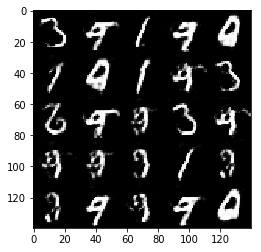

Epoch 2/2... Batch 810... Discriminator Loss: 1.2465... Generator Loss: 0.8308
Epoch 2/2... Batch 820... Discriminator Loss: 1.1518... Generator Loss: 0.8536
Epoch 2/2... Batch 830... Discriminator Loss: 1.2901... Generator Loss: 0.6747
Epoch 2/2... Batch 840... Discriminator Loss: 1.2705... Generator Loss: 1.1164
Epoch 2/2... Batch 850... Discriminator Loss: 0.9739... Generator Loss: 1.4358
Epoch 2/2... Batch 860... Discriminator Loss: 1.1177... Generator Loss: 1.0154
Epoch 2/2... Batch 870... Discriminator Loss: 1.0009... Generator Loss: 1.4426
Epoch 2/2... Batch 880... Discriminator Loss: 1.2165... Generator Loss: 0.7654
Epoch 2/2... Batch 890... Discriminator Loss: 1.1289... Generator Loss: 0.7474
Epoch 2/2... Batch 900... Discriminator Loss: 1.0588... Generator Loss: 1.3689


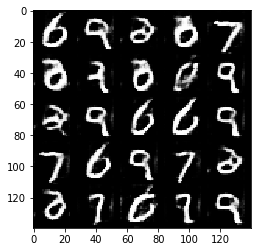

Epoch 2/2... Batch 910... Discriminator Loss: 1.1008... Generator Loss: 1.2618
Epoch 2/2... Batch 920... Discriminator Loss: 1.1481... Generator Loss: 0.8853
Epoch 2/2... Batch 930... Discriminator Loss: 1.1011... Generator Loss: 1.5707
Epoch 2/2... Batch 940... Discriminator Loss: 0.8923... Generator Loss: 1.3242
Epoch 2/2... Batch 950... Discriminator Loss: 1.1677... Generator Loss: 0.8068
Epoch 2/2... Batch 960... Discriminator Loss: 1.1446... Generator Loss: 2.1772
Epoch 2/2... Batch 970... Discriminator Loss: 1.2311... Generator Loss: 0.8923
Epoch 2/2... Batch 980... Discriminator Loss: 1.1892... Generator Loss: 0.8133
Epoch 2/2... Batch 990... Discriminator Loss: 1.2089... Generator Loss: 0.7426
Epoch 2/2... Batch 1000... Discriminator Loss: 1.4760... Generator Loss: 0.4905


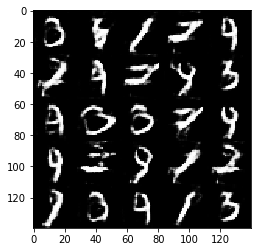

Epoch 2/2... Batch 1010... Discriminator Loss: 1.2762... Generator Loss: 0.6677
Epoch 2/2... Batch 1020... Discriminator Loss: 1.1491... Generator Loss: 0.7739
Epoch 2/2... Batch 1030... Discriminator Loss: 1.0956... Generator Loss: 0.9375
Epoch 2/2... Batch 1040... Discriminator Loss: 1.3486... Generator Loss: 0.6912
Epoch 2/2... Batch 1050... Discriminator Loss: 1.0945... Generator Loss: 1.3782
Epoch 2/2... Batch 1060... Discriminator Loss: 1.3008... Generator Loss: 0.9884
Epoch 2/2... Batch 1070... Discriminator Loss: 1.2864... Generator Loss: 0.6772
Epoch 2/2... Batch 1080... Discriminator Loss: 1.0344... Generator Loss: 1.5664
Epoch 2/2... Batch 1090... Discriminator Loss: 1.2238... Generator Loss: 0.7109
Epoch 2/2... Batch 1100... Discriminator Loss: 1.4207... Generator Loss: 1.9061


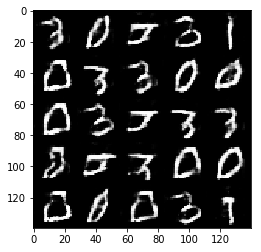

Epoch 2/2... Batch 1110... Discriminator Loss: 1.1295... Generator Loss: 1.7988
Epoch 2/2... Batch 1120... Discriminator Loss: 1.0203... Generator Loss: 2.1002
Epoch 2/2... Batch 1130... Discriminator Loss: 1.1753... Generator Loss: 0.8247
Epoch 2/2... Batch 1140... Discriminator Loss: 1.3193... Generator Loss: 0.5618
Epoch 2/2... Batch 1150... Discriminator Loss: 1.1766... Generator Loss: 1.0200
Epoch 2/2... Batch 1160... Discriminator Loss: 0.9812... Generator Loss: 1.3524
Epoch 2/2... Batch 1170... Discriminator Loss: 1.0515... Generator Loss: 1.5198
Epoch 2/2... Batch 1180... Discriminator Loss: 1.1645... Generator Loss: 0.8689
Epoch 2/2... Batch 1190... Discriminator Loss: 1.1142... Generator Loss: 1.1771
Epoch 2/2... Batch 1200... Discriminator Loss: 1.2951... Generator Loss: 0.6312


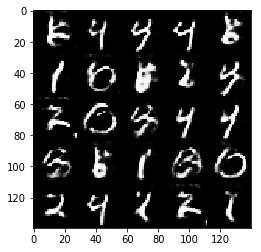

Epoch 2/2... Batch 1210... Discriminator Loss: 1.2928... Generator Loss: 1.4209
Epoch 2/2... Batch 1220... Discriminator Loss: 1.5942... Generator Loss: 0.3946
Epoch 2/2... Batch 1230... Discriminator Loss: 1.1768... Generator Loss: 0.9739
Epoch 2/2... Batch 1240... Discriminator Loss: 1.1342... Generator Loss: 1.5362
Epoch 2/2... Batch 1250... Discriminator Loss: 1.0431... Generator Loss: 0.8333
Epoch 2/2... Batch 1260... Discriminator Loss: 1.3283... Generator Loss: 0.5554
Epoch 2/2... Batch 1270... Discriminator Loss: 1.5428... Generator Loss: 0.6398
Epoch 2/2... Batch 1280... Discriminator Loss: 1.2376... Generator Loss: 1.1990
Epoch 2/2... Batch 1290... Discriminator Loss: 1.2279... Generator Loss: 0.9183
Epoch 2/2... Batch 1300... Discriminator Loss: 1.0047... Generator Loss: 1.2336


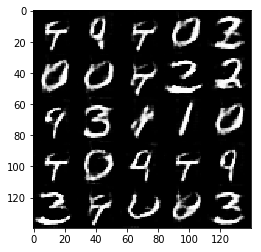

Epoch 2/2... Batch 1310... Discriminator Loss: 1.3620... Generator Loss: 1.0541
Epoch 2/2... Batch 1320... Discriminator Loss: 1.1492... Generator Loss: 1.4872
Epoch 2/2... Batch 1330... Discriminator Loss: 1.2191... Generator Loss: 0.6538
Epoch 2/2... Batch 1340... Discriminator Loss: 1.3383... Generator Loss: 0.7581
Epoch 2/2... Batch 1350... Discriminator Loss: 1.0465... Generator Loss: 1.0605
Epoch 2/2... Batch 1360... Discriminator Loss: 1.7847... Generator Loss: 0.2906
Epoch 2/2... Batch 1370... Discriminator Loss: 1.3594... Generator Loss: 1.0910
Epoch 2/2... Batch 1380... Discriminator Loss: 1.0513... Generator Loss: 1.0589
Epoch 2/2... Batch 1390... Discriminator Loss: 1.1740... Generator Loss: 0.9329
Epoch 2/2... Batch 1400... Discriminator Loss: 1.2492... Generator Loss: 1.1512


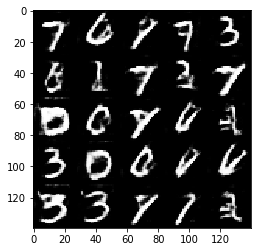

Epoch 2/2... Batch 1410... Discriminator Loss: 1.6564... Generator Loss: 0.4098
Epoch 2/2... Batch 1420... Discriminator Loss: 1.1337... Generator Loss: 0.7987
Epoch 2/2... Batch 1430... Discriminator Loss: 1.4290... Generator Loss: 1.2564
Epoch 2/2... Batch 1440... Discriminator Loss: 1.3265... Generator Loss: 1.2419
Epoch 2/2... Batch 1450... Discriminator Loss: 1.3191... Generator Loss: 0.6761
Epoch 2/2... Batch 1460... Discriminator Loss: 0.9250... Generator Loss: 1.8740
Epoch 2/2... Batch 1470... Discriminator Loss: 1.0568... Generator Loss: 1.0513
Epoch 2/2... Batch 1480... Discriminator Loss: 1.1900... Generator Loss: 0.7377
Epoch 2/2... Batch 1490... Discriminator Loss: 1.2011... Generator Loss: 1.1178
Epoch 2/2... Batch 1500... Discriminator Loss: 1.0190... Generator Loss: 1.0364


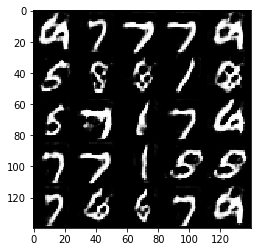

Epoch 2/2... Batch 1510... Discriminator Loss: 0.8262... Generator Loss: 1.5364
Epoch 2/2... Batch 1520... Discriminator Loss: 1.0968... Generator Loss: 1.5310
Epoch 2/2... Batch 1530... Discriminator Loss: 1.2490... Generator Loss: 1.1279
Epoch 2/2... Batch 1540... Discriminator Loss: 1.2645... Generator Loss: 0.5930
Epoch 2/2... Batch 1550... Discriminator Loss: 1.0117... Generator Loss: 1.0145
Epoch 2/2... Batch 1560... Discriminator Loss: 0.8528... Generator Loss: 1.2601
Epoch 2/2... Batch 1570... Discriminator Loss: 1.2960... Generator Loss: 0.6434
Epoch 2/2... Batch 1580... Discriminator Loss: 1.4795... Generator Loss: 0.5122
Epoch 2/2... Batch 1590... Discriminator Loss: 1.4359... Generator Loss: 0.7123
Epoch 2/2... Batch 1600... Discriminator Loss: 1.1853... Generator Loss: 0.8797


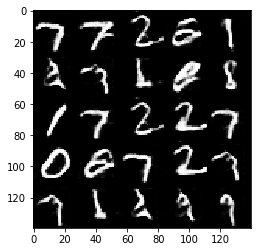

Epoch 2/2... Batch 1610... Discriminator Loss: 1.1630... Generator Loss: 0.8691
Epoch 2/2... Batch 1620... Discriminator Loss: 1.2024... Generator Loss: 0.7289
Epoch 2/2... Batch 1630... Discriminator Loss: 0.9611... Generator Loss: 1.2050
Epoch 2/2... Batch 1640... Discriminator Loss: 1.5765... Generator Loss: 0.5115
Epoch 2/2... Batch 1650... Discriminator Loss: 1.1851... Generator Loss: 0.9716
Epoch 2/2... Batch 1660... Discriminator Loss: 1.0171... Generator Loss: 1.3502
Epoch 2/2... Batch 1670... Discriminator Loss: 1.2738... Generator Loss: 0.6074
Epoch 2/2... Batch 1680... Discriminator Loss: 1.1059... Generator Loss: 0.7569
Epoch 2/2... Batch 1690... Discriminator Loss: 0.9830... Generator Loss: 1.1874
Epoch 2/2... Batch 1700... Discriminator Loss: 1.0856... Generator Loss: 0.9849


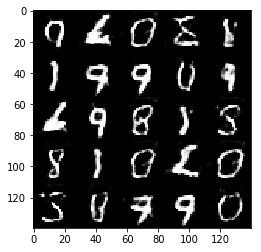

Epoch 2/2... Batch 1710... Discriminator Loss: 1.1194... Generator Loss: 1.1627
Epoch 2/2... Batch 1720... Discriminator Loss: 1.2289... Generator Loss: 0.7783
Epoch 2/2... Batch 1730... Discriminator Loss: 0.9979... Generator Loss: 1.1903
Epoch 2/2... Batch 1740... Discriminator Loss: 1.1517... Generator Loss: 0.8186
Epoch 2/2... Batch 1750... Discriminator Loss: 1.0585... Generator Loss: 1.2370
Epoch 2/2... Batch 1760... Discriminator Loss: 1.1488... Generator Loss: 1.5911
Epoch 2/2... Batch 1770... Discriminator Loss: 1.0033... Generator Loss: 1.3138
Epoch 2/2... Batch 1780... Discriminator Loss: 1.1978... Generator Loss: 0.6825
Epoch 2/2... Batch 1790... Discriminator Loss: 1.1165... Generator Loss: 0.7966
Epoch 2/2... Batch 1800... Discriminator Loss: 1.7237... Generator Loss: 0.3607


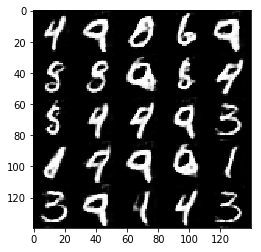

Epoch 2/2... Batch 1810... Discriminator Loss: 1.2445... Generator Loss: 0.6785
Epoch 2/2... Batch 1820... Discriminator Loss: 1.5826... Generator Loss: 0.3884
Epoch 2/2... Batch 1830... Discriminator Loss: 1.1489... Generator Loss: 0.9058
Epoch 2/2... Batch 1840... Discriminator Loss: 1.3077... Generator Loss: 0.7024
Epoch 2/2... Batch 1850... Discriminator Loss: 1.0614... Generator Loss: 0.8912
Epoch 2/2... Batch 1860... Discriminator Loss: 1.0680... Generator Loss: 1.0042
Epoch 2/2... Batch 1870... Discriminator Loss: 1.3745... Generator Loss: 0.5581


In [43]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 5.2289... Generator Loss: 0.0254
Epoch 1/1... Batch 20... Discriminator Loss: 3.4096... Generator Loss: 0.3106
Epoch 1/1... Batch 30... Discriminator Loss: 3.8290... Generator Loss: 0.2399
Epoch 1/1... Batch 40... Discriminator Loss: 3.9362... Generator Loss: 0.2055
Epoch 1/1... Batch 50... Discriminator Loss: 3.0442... Generator Loss: 0.7772
Epoch 1/1... Batch 60... Discriminator Loss: 2.7194... Generator Loss: 0.2593
Epoch 1/1... Batch 70... Discriminator Loss: 2.3049... Generator Loss: 0.8610
Epoch 1/1... Batch 80... Discriminator Loss: 2.3084... Generator Loss: 0.7723
Epoch 1/1... Batch 90... Discriminator Loss: 1.9556... Generator Loss: 0.5758
Epoch 1/1... Batch 100... Discriminator Loss: 1.2632... Generator Loss: 1.1327


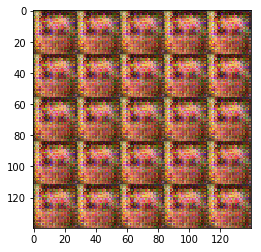

Epoch 1/1... Batch 110... Discriminator Loss: 1.3002... Generator Loss: 1.3389
Epoch 1/1... Batch 120... Discriminator Loss: 1.1302... Generator Loss: 1.4041
Epoch 1/1... Batch 130... Discriminator Loss: 0.9483... Generator Loss: 1.7644
Epoch 1/1... Batch 140... Discriminator Loss: 2.3822... Generator Loss: 0.5754
Epoch 1/1... Batch 150... Discriminator Loss: 1.9891... Generator Loss: 0.6747
Epoch 1/1... Batch 160... Discriminator Loss: 1.8967... Generator Loss: 0.7215
Epoch 1/1... Batch 170... Discriminator Loss: 1.7591... Generator Loss: 0.6771
Epoch 1/1... Batch 180... Discriminator Loss: 1.8475... Generator Loss: 0.5084
Epoch 1/1... Batch 190... Discriminator Loss: 1.2868... Generator Loss: 0.9456
Epoch 1/1... Batch 200... Discriminator Loss: 1.4788... Generator Loss: 0.6994


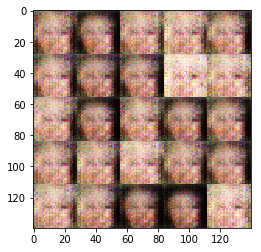

Epoch 1/1... Batch 210... Discriminator Loss: 1.4830... Generator Loss: 0.7421
Epoch 1/1... Batch 220... Discriminator Loss: 1.5518... Generator Loss: 0.7706
Epoch 1/1... Batch 230... Discriminator Loss: 1.2611... Generator Loss: 0.8495
Epoch 1/1... Batch 240... Discriminator Loss: 1.5238... Generator Loss: 0.8434
Epoch 1/1... Batch 250... Discriminator Loss: 1.1394... Generator Loss: 1.0882
Epoch 1/1... Batch 260... Discriminator Loss: 1.4855... Generator Loss: 0.7399
Epoch 1/1... Batch 270... Discriminator Loss: 2.4496... Generator Loss: 0.3714
Epoch 1/1... Batch 280... Discriminator Loss: 1.7352... Generator Loss: 0.6357
Epoch 1/1... Batch 290... Discriminator Loss: 1.8034... Generator Loss: 0.6642
Epoch 1/1... Batch 300... Discriminator Loss: 1.6140... Generator Loss: 0.7461


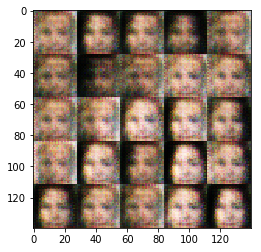

Epoch 1/1... Batch 310... Discriminator Loss: 1.5870... Generator Loss: 0.6616
Epoch 1/1... Batch 320... Discriminator Loss: 1.4792... Generator Loss: 0.6704
Epoch 1/1... Batch 330... Discriminator Loss: 1.4193... Generator Loss: 0.7343
Epoch 1/1... Batch 340... Discriminator Loss: 1.3784... Generator Loss: 0.7469
Epoch 1/1... Batch 350... Discriminator Loss: 1.4514... Generator Loss: 0.7751
Epoch 1/1... Batch 360... Discriminator Loss: 1.6087... Generator Loss: 0.6968
Epoch 1/1... Batch 370... Discriminator Loss: 1.4773... Generator Loss: 0.7422
Epoch 1/1... Batch 380... Discriminator Loss: 1.5757... Generator Loss: 0.7126
Epoch 1/1... Batch 390... Discriminator Loss: 1.5326... Generator Loss: 0.7713
Epoch 1/1... Batch 400... Discriminator Loss: 1.5197... Generator Loss: 0.7083


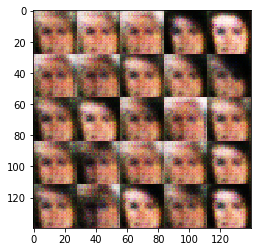

Epoch 1/1... Batch 410... Discriminator Loss: 2.0885... Generator Loss: 0.4677
Epoch 1/1... Batch 420... Discriminator Loss: 1.5196... Generator Loss: 0.6957
Epoch 1/1... Batch 430... Discriminator Loss: 1.5349... Generator Loss: 0.7089
Epoch 1/1... Batch 440... Discriminator Loss: 1.3843... Generator Loss: 0.8350
Epoch 1/1... Batch 450... Discriminator Loss: 1.3607... Generator Loss: 0.8295
Epoch 1/1... Batch 460... Discriminator Loss: 1.4248... Generator Loss: 0.7574
Epoch 1/1... Batch 470... Discriminator Loss: 1.3342... Generator Loss: 0.8557
Epoch 1/1... Batch 480... Discriminator Loss: 1.5207... Generator Loss: 0.7605
Epoch 1/1... Batch 490... Discriminator Loss: 1.3194... Generator Loss: 0.7995
Epoch 1/1... Batch 500... Discriminator Loss: 1.4674... Generator Loss: 0.8087


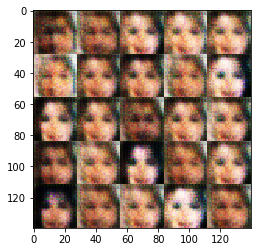

Epoch 1/1... Batch 510... Discriminator Loss: 1.7714... Generator Loss: 0.6235
Epoch 1/1... Batch 520... Discriminator Loss: 1.5492... Generator Loss: 0.5612
Epoch 1/1... Batch 530... Discriminator Loss: 1.5974... Generator Loss: 0.6918
Epoch 1/1... Batch 540... Discriminator Loss: 1.3764... Generator Loss: 0.8166
Epoch 1/1... Batch 550... Discriminator Loss: 1.6121... Generator Loss: 0.6573
Epoch 1/1... Batch 560... Discriminator Loss: 1.4601... Generator Loss: 0.7749
Epoch 1/1... Batch 570... Discriminator Loss: 1.5083... Generator Loss: 0.8064
Epoch 1/1... Batch 580... Discriminator Loss: 1.4844... Generator Loss: 0.8093
Epoch 1/1... Batch 590... Discriminator Loss: 1.5458... Generator Loss: 0.7322
Epoch 1/1... Batch 600... Discriminator Loss: 1.6501... Generator Loss: 0.5222


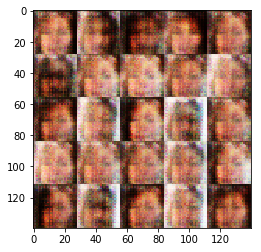

Epoch 1/1... Batch 610... Discriminator Loss: 1.4794... Generator Loss: 0.7400
Epoch 1/1... Batch 620... Discriminator Loss: 1.3107... Generator Loss: 0.8966
Epoch 1/1... Batch 630... Discriminator Loss: 1.4606... Generator Loss: 0.7122
Epoch 1/1... Batch 640... Discriminator Loss: 1.5665... Generator Loss: 0.7214
Epoch 1/1... Batch 650... Discriminator Loss: 1.6075... Generator Loss: 0.6213
Epoch 1/1... Batch 660... Discriminator Loss: 1.3797... Generator Loss: 0.8011
Epoch 1/1... Batch 670... Discriminator Loss: 1.5724... Generator Loss: 0.6668
Epoch 1/1... Batch 680... Discriminator Loss: 1.6698... Generator Loss: 0.6586
Epoch 1/1... Batch 690... Discriminator Loss: 1.4682... Generator Loss: 0.8239
Epoch 1/1... Batch 700... Discriminator Loss: 1.7284... Generator Loss: 0.5064


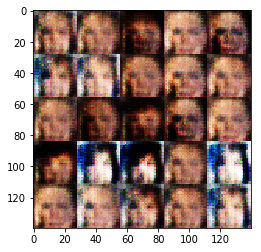

Epoch 1/1... Batch 710... Discriminator Loss: 1.7149... Generator Loss: 0.6065
Epoch 1/1... Batch 720... Discriminator Loss: 1.4585... Generator Loss: 0.7491
Epoch 1/1... Batch 730... Discriminator Loss: 1.5462... Generator Loss: 0.6650
Epoch 1/1... Batch 740... Discriminator Loss: 1.5345... Generator Loss: 0.6313
Epoch 1/1... Batch 750... Discriminator Loss: 1.4504... Generator Loss: 0.7487
Epoch 1/1... Batch 760... Discriminator Loss: 1.5537... Generator Loss: 0.7400
Epoch 1/1... Batch 770... Discriminator Loss: 1.5472... Generator Loss: 0.7584
Epoch 1/1... Batch 780... Discriminator Loss: 1.5049... Generator Loss: 0.7087
Epoch 1/1... Batch 790... Discriminator Loss: 1.3845... Generator Loss: 0.7600
Epoch 1/1... Batch 800... Discriminator Loss: 1.3583... Generator Loss: 0.7902


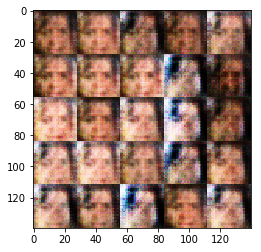

Epoch 1/1... Batch 810... Discriminator Loss: 1.6469... Generator Loss: 0.6016
Epoch 1/1... Batch 820... Discriminator Loss: 1.5033... Generator Loss: 0.7159
Epoch 1/1... Batch 830... Discriminator Loss: 1.4536... Generator Loss: 0.7273
Epoch 1/1... Batch 840... Discriminator Loss: 1.5248... Generator Loss: 0.7287
Epoch 1/1... Batch 850... Discriminator Loss: 1.4747... Generator Loss: 0.7017
Epoch 1/1... Batch 860... Discriminator Loss: 1.4112... Generator Loss: 0.6614
Epoch 1/1... Batch 870... Discriminator Loss: 1.5077... Generator Loss: 0.6994
Epoch 1/1... Batch 880... Discriminator Loss: 1.5389... Generator Loss: 0.7027
Epoch 1/1... Batch 890... Discriminator Loss: 1.4172... Generator Loss: 0.8636
Epoch 1/1... Batch 900... Discriminator Loss: 1.4820... Generator Loss: 0.6911


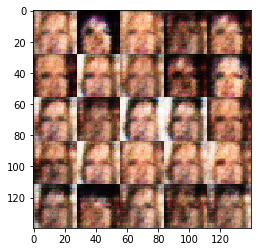

Epoch 1/1... Batch 910... Discriminator Loss: 1.5529... Generator Loss: 0.6550
Epoch 1/1... Batch 920... Discriminator Loss: 1.5296... Generator Loss: 0.7655
Epoch 1/1... Batch 930... Discriminator Loss: 1.5851... Generator Loss: 0.6625
Epoch 1/1... Batch 940... Discriminator Loss: 1.4212... Generator Loss: 0.7662
Epoch 1/1... Batch 950... Discriminator Loss: 1.5428... Generator Loss: 0.6455
Epoch 1/1... Batch 960... Discriminator Loss: 1.4324... Generator Loss: 0.7393
Epoch 1/1... Batch 970... Discriminator Loss: 1.5270... Generator Loss: 0.7239
Epoch 1/1... Batch 980... Discriminator Loss: 1.5384... Generator Loss: 0.7048
Epoch 1/1... Batch 990... Discriminator Loss: 1.5818... Generator Loss: 0.7133
Epoch 1/1... Batch 1000... Discriminator Loss: 1.4968... Generator Loss: 0.7703


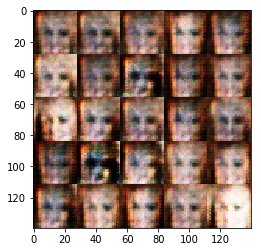

Epoch 1/1... Batch 1010... Discriminator Loss: 1.4852... Generator Loss: 0.7557
Epoch 1/1... Batch 1020... Discriminator Loss: 1.4470... Generator Loss: 0.7440
Epoch 1/1... Batch 1030... Discriminator Loss: 1.4613... Generator Loss: 0.7057
Epoch 1/1... Batch 1040... Discriminator Loss: 1.5637... Generator Loss: 0.7306
Epoch 1/1... Batch 1050... Discriminator Loss: 1.5286... Generator Loss: 0.7522
Epoch 1/1... Batch 1060... Discriminator Loss: 1.4536... Generator Loss: 0.6938
Epoch 1/1... Batch 1070... Discriminator Loss: 1.4823... Generator Loss: 0.6542
Epoch 1/1... Batch 1080... Discriminator Loss: 1.4608... Generator Loss: 0.7481
Epoch 1/1... Batch 1090... Discriminator Loss: 1.4456... Generator Loss: 0.7309
Epoch 1/1... Batch 1100... Discriminator Loss: 1.4854... Generator Loss: 0.6721


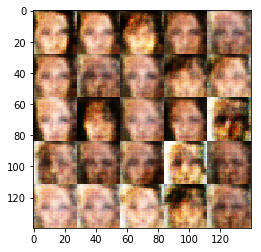

Epoch 1/1... Batch 1110... Discriminator Loss: 1.5458... Generator Loss: 0.6713
Epoch 1/1... Batch 1120... Discriminator Loss: 1.4557... Generator Loss: 0.7668
Epoch 1/1... Batch 1130... Discriminator Loss: 1.4383... Generator Loss: 0.7812
Epoch 1/1... Batch 1140... Discriminator Loss: 1.4994... Generator Loss: 0.7039
Epoch 1/1... Batch 1150... Discriminator Loss: 1.4982... Generator Loss: 0.7347
Epoch 1/1... Batch 1160... Discriminator Loss: 1.5398... Generator Loss: 0.6738
Epoch 1/1... Batch 1170... Discriminator Loss: 1.4299... Generator Loss: 0.7471
Epoch 1/1... Batch 1180... Discriminator Loss: 1.5480... Generator Loss: 0.6845
Epoch 1/1... Batch 1190... Discriminator Loss: 1.5227... Generator Loss: 0.7013
Epoch 1/1... Batch 1200... Discriminator Loss: 1.4314... Generator Loss: 0.7877


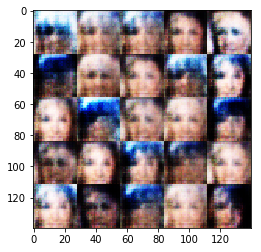

Epoch 1/1... Batch 1210... Discriminator Loss: 1.5249... Generator Loss: 0.6838
Epoch 1/1... Batch 1220... Discriminator Loss: 1.6256... Generator Loss: 0.6539
Epoch 1/1... Batch 1230... Discriminator Loss: 1.4564... Generator Loss: 0.8050
Epoch 1/1... Batch 1240... Discriminator Loss: 1.4307... Generator Loss: 0.7568
Epoch 1/1... Batch 1250... Discriminator Loss: 1.4845... Generator Loss: 0.6839
Epoch 1/1... Batch 1260... Discriminator Loss: 1.5082... Generator Loss: 0.6867
Epoch 1/1... Batch 1270... Discriminator Loss: 1.4361... Generator Loss: 0.7161
Epoch 1/1... Batch 1280... Discriminator Loss: 1.4778... Generator Loss: 0.7262
Epoch 1/1... Batch 1290... Discriminator Loss: 1.5063... Generator Loss: 0.6891
Epoch 1/1... Batch 1300... Discriminator Loss: 1.4377... Generator Loss: 0.7522


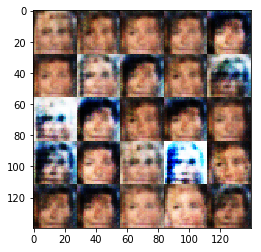

Epoch 1/1... Batch 1310... Discriminator Loss: 1.4299... Generator Loss: 0.7754
Epoch 1/1... Batch 1320... Discriminator Loss: 1.4867... Generator Loss: 0.7570
Epoch 1/1... Batch 1330... Discriminator Loss: 1.4785... Generator Loss: 0.7704
Epoch 1/1... Batch 1340... Discriminator Loss: 1.4229... Generator Loss: 0.7181
Epoch 1/1... Batch 1350... Discriminator Loss: 1.4927... Generator Loss: 0.7874
Epoch 1/1... Batch 1360... Discriminator Loss: 1.4222... Generator Loss: 0.7625
Epoch 1/1... Batch 1370... Discriminator Loss: 1.5039... Generator Loss: 0.6959
Epoch 1/1... Batch 1380... Discriminator Loss: 1.4682... Generator Loss: 0.7397
Epoch 1/1... Batch 1390... Discriminator Loss: 1.4222... Generator Loss: 0.7614
Epoch 1/1... Batch 1400... Discriminator Loss: 1.4657... Generator Loss: 0.7720


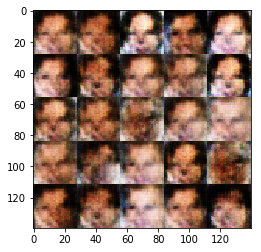

Epoch 1/1... Batch 1410... Discriminator Loss: 1.4370... Generator Loss: 0.7332
Epoch 1/1... Batch 1420... Discriminator Loss: 1.4515... Generator Loss: 0.7180
Epoch 1/1... Batch 1430... Discriminator Loss: 1.6006... Generator Loss: 0.6412
Epoch 1/1... Batch 1440... Discriminator Loss: 1.4309... Generator Loss: 0.7500
Epoch 1/1... Batch 1450... Discriminator Loss: 1.4120... Generator Loss: 0.6853
Epoch 1/1... Batch 1460... Discriminator Loss: 1.4687... Generator Loss: 0.7794
Epoch 1/1... Batch 1470... Discriminator Loss: 1.4719... Generator Loss: 0.6983
Epoch 1/1... Batch 1480... Discriminator Loss: 1.4459... Generator Loss: 0.7723
Epoch 1/1... Batch 1490... Discriminator Loss: 1.4901... Generator Loss: 0.7472
Epoch 1/1... Batch 1500... Discriminator Loss: 1.4445... Generator Loss: 0.7797


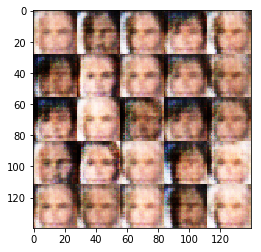

Epoch 1/1... Batch 1510... Discriminator Loss: 1.4052... Generator Loss: 0.8038
Epoch 1/1... Batch 1520... Discriminator Loss: 1.5150... Generator Loss: 0.7338
Epoch 1/1... Batch 1530... Discriminator Loss: 1.3890... Generator Loss: 0.7666
Epoch 1/1... Batch 1540... Discriminator Loss: 1.5207... Generator Loss: 0.7266
Epoch 1/1... Batch 1550... Discriminator Loss: 1.4208... Generator Loss: 0.8045
Epoch 1/1... Batch 1560... Discriminator Loss: 1.6227... Generator Loss: 0.6138
Epoch 1/1... Batch 1570... Discriminator Loss: 1.4340... Generator Loss: 0.6861
Epoch 1/1... Batch 1580... Discriminator Loss: 1.3617... Generator Loss: 0.7830
Epoch 1/1... Batch 1590... Discriminator Loss: 1.4316... Generator Loss: 0.7220
Epoch 1/1... Batch 1600... Discriminator Loss: 1.3339... Generator Loss: 0.7556


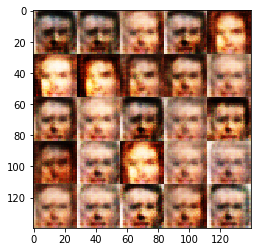

Epoch 1/1... Batch 1610... Discriminator Loss: 1.4899... Generator Loss: 0.7422
Epoch 1/1... Batch 1620... Discriminator Loss: 1.4336... Generator Loss: 0.7666
Epoch 1/1... Batch 1630... Discriminator Loss: 1.4545... Generator Loss: 0.6767
Epoch 1/1... Batch 1640... Discriminator Loss: 1.4280... Generator Loss: 0.7672
Epoch 1/1... Batch 1650... Discriminator Loss: 1.4199... Generator Loss: 0.7382
Epoch 1/1... Batch 1660... Discriminator Loss: 1.4613... Generator Loss: 0.7476
Epoch 1/1... Batch 1670... Discriminator Loss: 1.4738... Generator Loss: 0.7315
Epoch 1/1... Batch 1680... Discriminator Loss: 1.5370... Generator Loss: 0.6307
Epoch 1/1... Batch 1690... Discriminator Loss: 1.4586... Generator Loss: 0.7070
Epoch 1/1... Batch 1700... Discriminator Loss: 1.4106... Generator Loss: 0.7512


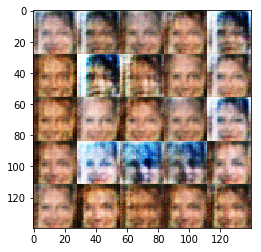

Epoch 1/1... Batch 1710... Discriminator Loss: 1.4208... Generator Loss: 0.7551
Epoch 1/1... Batch 1720... Discriminator Loss: 1.6510... Generator Loss: 0.5976
Epoch 1/1... Batch 1730... Discriminator Loss: 1.4070... Generator Loss: 0.7537
Epoch 1/1... Batch 1740... Discriminator Loss: 1.4646... Generator Loss: 0.7676
Epoch 1/1... Batch 1750... Discriminator Loss: 1.4519... Generator Loss: 0.7380
Epoch 1/1... Batch 1760... Discriminator Loss: 1.4317... Generator Loss: 0.7828
Epoch 1/1... Batch 1770... Discriminator Loss: 1.4233... Generator Loss: 0.7751
Epoch 1/1... Batch 1780... Discriminator Loss: 1.4262... Generator Loss: 0.7451
Epoch 1/1... Batch 1790... Discriminator Loss: 1.4523... Generator Loss: 0.7418
Epoch 1/1... Batch 1800... Discriminator Loss: 1.4563... Generator Loss: 0.7606


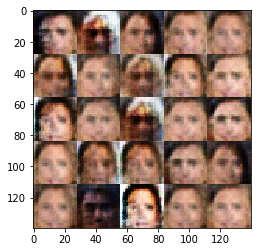

Epoch 1/1... Batch 1810... Discriminator Loss: 1.3975... Generator Loss: 0.8227
Epoch 1/1... Batch 1820... Discriminator Loss: 1.4885... Generator Loss: 0.6854
Epoch 1/1... Batch 1830... Discriminator Loss: 1.4030... Generator Loss: 0.7918
Epoch 1/1... Batch 1840... Discriminator Loss: 1.4715... Generator Loss: 0.7378
Epoch 1/1... Batch 1850... Discriminator Loss: 1.4359... Generator Loss: 0.7267
Epoch 1/1... Batch 1860... Discriminator Loss: 1.4456... Generator Loss: 0.7811
Epoch 1/1... Batch 1870... Discriminator Loss: 1.5019... Generator Loss: 0.6576
Epoch 1/1... Batch 1880... Discriminator Loss: 1.4540... Generator Loss: 0.7652
Epoch 1/1... Batch 1890... Discriminator Loss: 1.4391... Generator Loss: 0.7891
Epoch 1/1... Batch 1900... Discriminator Loss: 1.4418... Generator Loss: 0.7203


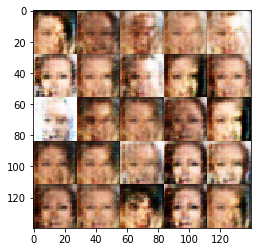

Epoch 1/1... Batch 1910... Discriminator Loss: 1.4893... Generator Loss: 0.7383
Epoch 1/1... Batch 1920... Discriminator Loss: 1.4049... Generator Loss: 0.7317
Epoch 1/1... Batch 1930... Discriminator Loss: 1.3960... Generator Loss: 0.7874
Epoch 1/1... Batch 1940... Discriminator Loss: 1.4212... Generator Loss: 0.7209
Epoch 1/1... Batch 1950... Discriminator Loss: 1.4355... Generator Loss: 0.7573
Epoch 1/1... Batch 1960... Discriminator Loss: 1.4091... Generator Loss: 0.7487
Epoch 1/1... Batch 1970... Discriminator Loss: 1.4118... Generator Loss: 0.7634
Epoch 1/1... Batch 1980... Discriminator Loss: 1.4527... Generator Loss: 0.7363
Epoch 1/1... Batch 1990... Discriminator Loss: 1.3767... Generator Loss: 0.7954
Epoch 1/1... Batch 2000... Discriminator Loss: 1.4451... Generator Loss: 0.7457


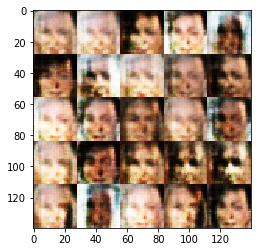

Epoch 1/1... Batch 2010... Discriminator Loss: 1.4555... Generator Loss: 0.7249
Epoch 1/1... Batch 2020... Discriminator Loss: 1.4313... Generator Loss: 0.7372
Epoch 1/1... Batch 2030... Discriminator Loss: 1.4280... Generator Loss: 0.7709
Epoch 1/1... Batch 2040... Discriminator Loss: 1.4200... Generator Loss: 0.7826
Epoch 1/1... Batch 2050... Discriminator Loss: 1.4491... Generator Loss: 0.7471
Epoch 1/1... Batch 2060... Discriminator Loss: 1.4254... Generator Loss: 0.7303
Epoch 1/1... Batch 2070... Discriminator Loss: 1.4375... Generator Loss: 0.7429
Epoch 1/1... Batch 2080... Discriminator Loss: 1.3773... Generator Loss: 0.7474
Epoch 1/1... Batch 2090... Discriminator Loss: 1.3755... Generator Loss: 0.8113
Epoch 1/1... Batch 2100... Discriminator Loss: 1.4217... Generator Loss: 0.7216


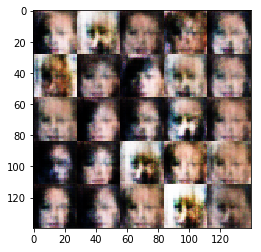

Epoch 1/1... Batch 2110... Discriminator Loss: 1.4893... Generator Loss: 0.7235
Epoch 1/1... Batch 2120... Discriminator Loss: 1.4484... Generator Loss: 0.7222
Epoch 1/1... Batch 2130... Discriminator Loss: 1.4613... Generator Loss: 0.7241
Epoch 1/1... Batch 2140... Discriminator Loss: 1.5035... Generator Loss: 0.7404
Epoch 1/1... Batch 2150... Discriminator Loss: 1.4108... Generator Loss: 0.7981
Epoch 1/1... Batch 2160... Discriminator Loss: 1.4272... Generator Loss: 0.7327
Epoch 1/1... Batch 2170... Discriminator Loss: 1.4352... Generator Loss: 0.7320
Epoch 1/1... Batch 2180... Discriminator Loss: 1.4399... Generator Loss: 0.7647
Epoch 1/1... Batch 2190... Discriminator Loss: 1.4541... Generator Loss: 0.7474
Epoch 1/1... Batch 2200... Discriminator Loss: 1.4744... Generator Loss: 0.7001


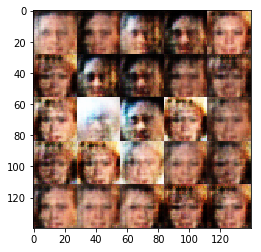

Epoch 1/1... Batch 2210... Discriminator Loss: 1.4794... Generator Loss: 0.7339
Epoch 1/1... Batch 2220... Discriminator Loss: 1.4518... Generator Loss: 0.7156
Epoch 1/1... Batch 2230... Discriminator Loss: 1.3848... Generator Loss: 0.8023
Epoch 1/1... Batch 2240... Discriminator Loss: 1.4036... Generator Loss: 0.7691
Epoch 1/1... Batch 2250... Discriminator Loss: 1.4548... Generator Loss: 0.7215
Epoch 1/1... Batch 2260... Discriminator Loss: 1.3884... Generator Loss: 0.8041
Epoch 1/1... Batch 2270... Discriminator Loss: 1.5217... Generator Loss: 0.6894
Epoch 1/1... Batch 2280... Discriminator Loss: 1.4391... Generator Loss: 0.8617
Epoch 1/1... Batch 2290... Discriminator Loss: 1.4838... Generator Loss: 0.7143
Epoch 1/1... Batch 2300... Discriminator Loss: 1.4727... Generator Loss: 0.7479


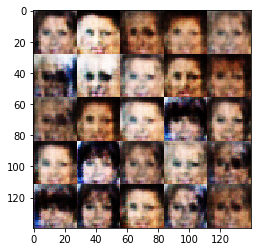

Epoch 1/1... Batch 2310... Discriminator Loss: 1.4511... Generator Loss: 0.7572
Epoch 1/1... Batch 2320... Discriminator Loss: 1.4592... Generator Loss: 0.6638
Epoch 1/1... Batch 2330... Discriminator Loss: 1.4338... Generator Loss: 0.7850
Epoch 1/1... Batch 2340... Discriminator Loss: 1.4415... Generator Loss: 0.7478
Epoch 1/1... Batch 2350... Discriminator Loss: 1.4338... Generator Loss: 0.7571
Epoch 1/1... Batch 2360... Discriminator Loss: 1.3994... Generator Loss: 0.7487
Epoch 1/1... Batch 2370... Discriminator Loss: 1.4428... Generator Loss: 0.7566
Epoch 1/1... Batch 2380... Discriminator Loss: 1.4245... Generator Loss: 0.7547
Epoch 1/1... Batch 2390... Discriminator Loss: 1.4836... Generator Loss: 0.7832
Epoch 1/1... Batch 2400... Discriminator Loss: 1.4862... Generator Loss: 0.7094


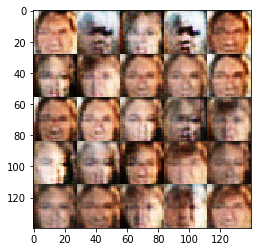

Epoch 1/1... Batch 2410... Discriminator Loss: 1.4259... Generator Loss: 0.7718
Epoch 1/1... Batch 2420... Discriminator Loss: 1.4139... Generator Loss: 0.7614
Epoch 1/1... Batch 2430... Discriminator Loss: 1.4769... Generator Loss: 0.6728
Epoch 1/1... Batch 2440... Discriminator Loss: 1.4713... Generator Loss: 0.7520
Epoch 1/1... Batch 2450... Discriminator Loss: 1.3873... Generator Loss: 0.8349
Epoch 1/1... Batch 2460... Discriminator Loss: 1.4010... Generator Loss: 0.7411
Epoch 1/1... Batch 2470... Discriminator Loss: 1.4990... Generator Loss: 0.7277
Epoch 1/1... Batch 2480... Discriminator Loss: 1.4183... Generator Loss: 0.7408
Epoch 1/1... Batch 2490... Discriminator Loss: 1.4401... Generator Loss: 0.7124
Epoch 1/1... Batch 2500... Discriminator Loss: 1.3940... Generator Loss: 0.8162


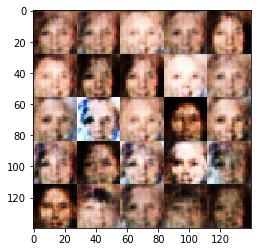

Epoch 1/1... Batch 2510... Discriminator Loss: 1.4530... Generator Loss: 0.7036
Epoch 1/1... Batch 2520... Discriminator Loss: 1.4746... Generator Loss: 0.6785
Epoch 1/1... Batch 2530... Discriminator Loss: 1.4268... Generator Loss: 0.7290
Epoch 1/1... Batch 2540... Discriminator Loss: 1.4009... Generator Loss: 0.7268
Epoch 1/1... Batch 2550... Discriminator Loss: 1.4190... Generator Loss: 0.7670
Epoch 1/1... Batch 2560... Discriminator Loss: 1.4190... Generator Loss: 0.7569
Epoch 1/1... Batch 2570... Discriminator Loss: 1.4089... Generator Loss: 0.7499
Epoch 1/1... Batch 2580... Discriminator Loss: 1.3753... Generator Loss: 0.7690
Epoch 1/1... Batch 2590... Discriminator Loss: 1.4404... Generator Loss: 0.7563
Epoch 1/1... Batch 2600... Discriminator Loss: 1.4284... Generator Loss: 0.7063


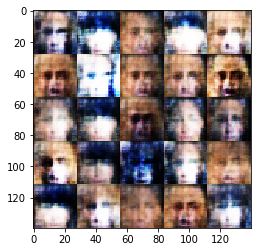

Epoch 1/1... Batch 2610... Discriminator Loss: 1.4025... Generator Loss: 0.7975
Epoch 1/1... Batch 2620... Discriminator Loss: 1.4461... Generator Loss: 0.7778
Epoch 1/1... Batch 2630... Discriminator Loss: 1.4170... Generator Loss: 0.7458
Epoch 1/1... Batch 2640... Discriminator Loss: 1.4531... Generator Loss: 0.7369
Epoch 1/1... Batch 2650... Discriminator Loss: 1.4240... Generator Loss: 0.7909
Epoch 1/1... Batch 2660... Discriminator Loss: 1.4246... Generator Loss: 0.7561
Epoch 1/1... Batch 2670... Discriminator Loss: 1.4413... Generator Loss: 0.7328
Epoch 1/1... Batch 2680... Discriminator Loss: 1.4603... Generator Loss: 0.7519
Epoch 1/1... Batch 2690... Discriminator Loss: 1.4155... Generator Loss: 0.7445
Epoch 1/1... Batch 2700... Discriminator Loss: 1.4318... Generator Loss: 0.7524


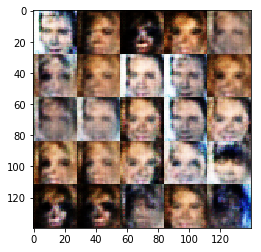

Epoch 1/1... Batch 2710... Discriminator Loss: 1.4767... Generator Loss: 0.7330
Epoch 1/1... Batch 2720... Discriminator Loss: 1.4562... Generator Loss: 0.7066
Epoch 1/1... Batch 2730... Discriminator Loss: 1.4215... Generator Loss: 0.8019
Epoch 1/1... Batch 2740... Discriminator Loss: 1.4328... Generator Loss: 0.7707
Epoch 1/1... Batch 2750... Discriminator Loss: 1.4036... Generator Loss: 0.7226
Epoch 1/1... Batch 2760... Discriminator Loss: 1.4279... Generator Loss: 0.7757
Epoch 1/1... Batch 2770... Discriminator Loss: 1.4324... Generator Loss: 0.8110
Epoch 1/1... Batch 2780... Discriminator Loss: 1.3877... Generator Loss: 0.7934
Epoch 1/1... Batch 2790... Discriminator Loss: 1.4171... Generator Loss: 0.7833
Epoch 1/1... Batch 2800... Discriminator Loss: 1.3770... Generator Loss: 0.8083


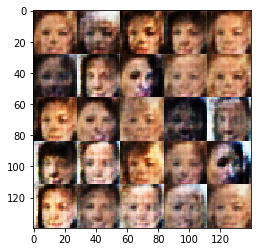

Epoch 1/1... Batch 2810... Discriminator Loss: 1.4510... Generator Loss: 0.7705
Epoch 1/1... Batch 2820... Discriminator Loss: 1.4131... Generator Loss: 0.8049
Epoch 1/1... Batch 2830... Discriminator Loss: 1.4161... Generator Loss: 0.7952
Epoch 1/1... Batch 2840... Discriminator Loss: 1.4630... Generator Loss: 0.7161
Epoch 1/1... Batch 2850... Discriminator Loss: 1.4251... Generator Loss: 0.7311
Epoch 1/1... Batch 2860... Discriminator Loss: 1.3687... Generator Loss: 0.7949
Epoch 1/1... Batch 2870... Discriminator Loss: 1.4265... Generator Loss: 0.8045
Epoch 1/1... Batch 2880... Discriminator Loss: 1.4226... Generator Loss: 0.7439
Epoch 1/1... Batch 2890... Discriminator Loss: 1.4171... Generator Loss: 0.7441
Epoch 1/1... Batch 2900... Discriminator Loss: 1.4846... Generator Loss: 0.7379


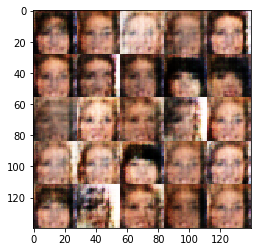

Epoch 1/1... Batch 2910... Discriminator Loss: 1.4469... Generator Loss: 0.7304
Epoch 1/1... Batch 2920... Discriminator Loss: 1.4206... Generator Loss: 0.7321
Epoch 1/1... Batch 2930... Discriminator Loss: 1.4238... Generator Loss: 0.7653
Epoch 1/1... Batch 2940... Discriminator Loss: 1.4032... Generator Loss: 0.7509
Epoch 1/1... Batch 2950... Discriminator Loss: 1.3901... Generator Loss: 0.8356
Epoch 1/1... Batch 2960... Discriminator Loss: 1.4341... Generator Loss: 0.7023
Epoch 1/1... Batch 2970... Discriminator Loss: 1.4086... Generator Loss: 0.7755
Epoch 1/1... Batch 2980... Discriminator Loss: 1.4151... Generator Loss: 0.7386
Epoch 1/1... Batch 2990... Discriminator Loss: 1.4270... Generator Loss: 0.7454
Epoch 1/1... Batch 3000... Discriminator Loss: 1.4299... Generator Loss: 0.7487


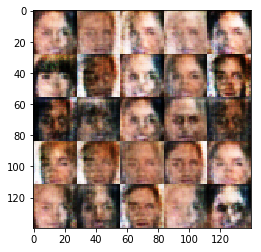

Epoch 1/1... Batch 3010... Discriminator Loss: 1.4288... Generator Loss: 0.7534
Epoch 1/1... Batch 3020... Discriminator Loss: 1.4521... Generator Loss: 0.7381
Epoch 1/1... Batch 3030... Discriminator Loss: 1.4399... Generator Loss: 0.7662
Epoch 1/1... Batch 3040... Discriminator Loss: 1.4432... Generator Loss: 0.7209
Epoch 1/1... Batch 3050... Discriminator Loss: 1.4604... Generator Loss: 0.7550
Epoch 1/1... Batch 3060... Discriminator Loss: 1.3812... Generator Loss: 0.7550
Epoch 1/1... Batch 3070... Discriminator Loss: 1.4169... Generator Loss: 0.7622
Epoch 1/1... Batch 3080... Discriminator Loss: 1.4381... Generator Loss: 0.7443
Epoch 1/1... Batch 3090... Discriminator Loss: 1.4435... Generator Loss: 0.7293
Epoch 1/1... Batch 3100... Discriminator Loss: 1.3974... Generator Loss: 0.8035


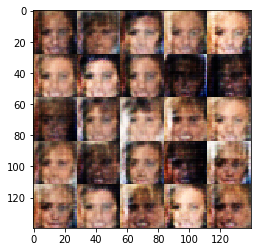

Epoch 1/1... Batch 3110... Discriminator Loss: 1.4773... Generator Loss: 0.6912
Epoch 1/1... Batch 3120... Discriminator Loss: 1.3817... Generator Loss: 0.8312
Epoch 1/1... Batch 3130... Discriminator Loss: 1.4267... Generator Loss: 0.7745
Epoch 1/1... Batch 3140... Discriminator Loss: 1.4373... Generator Loss: 0.7458
Epoch 1/1... Batch 3150... Discriminator Loss: 1.4286... Generator Loss: 0.7789
Epoch 1/1... Batch 3160... Discriminator Loss: 1.3967... Generator Loss: 0.7693
Epoch 1/1... Batch 3170... Discriminator Loss: 1.4551... Generator Loss: 0.7302
Epoch 1/1... Batch 3180... Discriminator Loss: 1.4635... Generator Loss: 0.7182
Epoch 1/1... Batch 3190... Discriminator Loss: 1.4361... Generator Loss: 0.7419
Epoch 1/1... Batch 3200... Discriminator Loss: 1.3980... Generator Loss: 0.7719


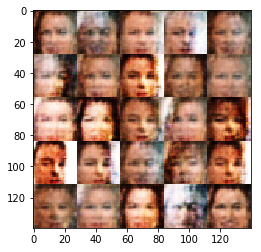

Epoch 1/1... Batch 3210... Discriminator Loss: 1.4181... Generator Loss: 0.7465
Epoch 1/1... Batch 3220... Discriminator Loss: 1.4070... Generator Loss: 0.7665
Epoch 1/1... Batch 3230... Discriminator Loss: 1.4047... Generator Loss: 0.7393
Epoch 1/1... Batch 3240... Discriminator Loss: 1.4637... Generator Loss: 0.7686
Epoch 1/1... Batch 3250... Discriminator Loss: 1.3971... Generator Loss: 0.7512
Epoch 1/1... Batch 3260... Discriminator Loss: 1.4514... Generator Loss: 0.7681
Epoch 1/1... Batch 3270... Discriminator Loss: 1.4528... Generator Loss: 0.7466
Epoch 1/1... Batch 3280... Discriminator Loss: 1.4568... Generator Loss: 0.7800
Epoch 1/1... Batch 3290... Discriminator Loss: 1.4383... Generator Loss: 0.7345
Epoch 1/1... Batch 3300... Discriminator Loss: 1.4018... Generator Loss: 0.8540


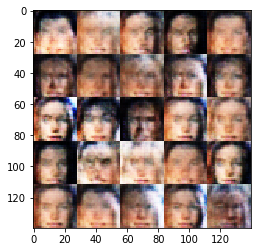

Epoch 1/1... Batch 3310... Discriminator Loss: 1.4375... Generator Loss: 0.7915
Epoch 1/1... Batch 3320... Discriminator Loss: 1.3986... Generator Loss: 0.7667
Epoch 1/1... Batch 3330... Discriminator Loss: 1.4028... Generator Loss: 0.7780
Epoch 1/1... Batch 3340... Discriminator Loss: 1.4092... Generator Loss: 0.8055
Epoch 1/1... Batch 3350... Discriminator Loss: 1.4254... Generator Loss: 0.7367
Epoch 1/1... Batch 3360... Discriminator Loss: 1.3981... Generator Loss: 0.7739
Epoch 1/1... Batch 3370... Discriminator Loss: 1.3949... Generator Loss: 0.7871
Epoch 1/1... Batch 3380... Discriminator Loss: 1.4286... Generator Loss: 0.7625
Epoch 1/1... Batch 3390... Discriminator Loss: 1.3961... Generator Loss: 0.7983
Epoch 1/1... Batch 3400... Discriminator Loss: 1.4160... Generator Loss: 0.7803


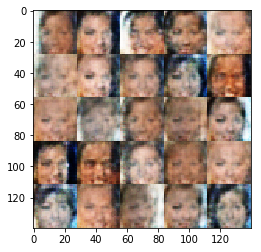

Epoch 1/1... Batch 3410... Discriminator Loss: 1.4206... Generator Loss: 0.7438
Epoch 1/1... Batch 3420... Discriminator Loss: 1.4167... Generator Loss: 0.7224
Epoch 1/1... Batch 3430... Discriminator Loss: 1.4160... Generator Loss: 0.7853
Epoch 1/1... Batch 3440... Discriminator Loss: 1.4018... Generator Loss: 0.7857
Epoch 1/1... Batch 3450... Discriminator Loss: 1.4376... Generator Loss: 0.8135
Epoch 1/1... Batch 3460... Discriminator Loss: 1.4493... Generator Loss: 0.7146
Epoch 1/1... Batch 3470... Discriminator Loss: 1.3808... Generator Loss: 0.7610
Epoch 1/1... Batch 3480... Discriminator Loss: 1.4623... Generator Loss: 0.7711
Epoch 1/1... Batch 3490... Discriminator Loss: 1.4325... Generator Loss: 0.7320
Epoch 1/1... Batch 3500... Discriminator Loss: 1.4342... Generator Loss: 0.7489


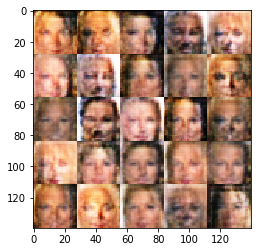

Epoch 1/1... Batch 3510... Discriminator Loss: 1.4018... Generator Loss: 0.7300
Epoch 1/1... Batch 3520... Discriminator Loss: 1.4468... Generator Loss: 0.7447
Epoch 1/1... Batch 3530... Discriminator Loss: 1.4251... Generator Loss: 0.7542
Epoch 1/1... Batch 3540... Discriminator Loss: 1.4077... Generator Loss: 0.7641
Epoch 1/1... Batch 3550... Discriminator Loss: 1.4700... Generator Loss: 0.7564
Epoch 1/1... Batch 3560... Discriminator Loss: 1.3885... Generator Loss: 0.7685
Epoch 1/1... Batch 3570... Discriminator Loss: 1.4514... Generator Loss: 0.7729
Epoch 1/1... Batch 3580... Discriminator Loss: 1.4227... Generator Loss: 0.7886
Epoch 1/1... Batch 3590... Discriminator Loss: 1.4147... Generator Loss: 0.7540
Epoch 1/1... Batch 3600... Discriminator Loss: 1.3943... Generator Loss: 0.7619


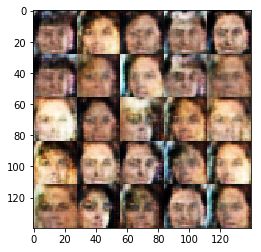

Epoch 1/1... Batch 3610... Discriminator Loss: 1.4462... Generator Loss: 0.7094
Epoch 1/1... Batch 3620... Discriminator Loss: 1.4004... Generator Loss: 0.8123
Epoch 1/1... Batch 3630... Discriminator Loss: 1.4124... Generator Loss: 0.7514
Epoch 1/1... Batch 3640... Discriminator Loss: 1.4063... Generator Loss: 0.7814
Epoch 1/1... Batch 3650... Discriminator Loss: 1.4512... Generator Loss: 0.7120
Epoch 1/1... Batch 3660... Discriminator Loss: 1.4006... Generator Loss: 0.7461
Epoch 1/1... Batch 3670... Discriminator Loss: 1.4327... Generator Loss: 0.7303
Epoch 1/1... Batch 3680... Discriminator Loss: 1.3719... Generator Loss: 0.8393
Epoch 1/1... Batch 3690... Discriminator Loss: 1.4049... Generator Loss: 0.7709
Epoch 1/1... Batch 3700... Discriminator Loss: 1.4137... Generator Loss: 0.7547


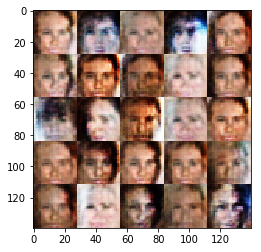

Epoch 1/1... Batch 3710... Discriminator Loss: 1.4347... Generator Loss: 0.7560
Epoch 1/1... Batch 3720... Discriminator Loss: 1.4467... Generator Loss: 0.7585
Epoch 1/1... Batch 3730... Discriminator Loss: 1.4076... Generator Loss: 0.8338
Epoch 1/1... Batch 3740... Discriminator Loss: 1.4294... Generator Loss: 0.7208
Epoch 1/1... Batch 3750... Discriminator Loss: 1.3932... Generator Loss: 0.7806
Epoch 1/1... Batch 3760... Discriminator Loss: 1.4177... Generator Loss: 0.7892
Epoch 1/1... Batch 3770... Discriminator Loss: 1.3927... Generator Loss: 0.8032
Epoch 1/1... Batch 3780... Discriminator Loss: 1.4016... Generator Loss: 0.7245
Epoch 1/1... Batch 3790... Discriminator Loss: 1.4306... Generator Loss: 0.7935
Epoch 1/1... Batch 3800... Discriminator Loss: 1.4016... Generator Loss: 0.7355


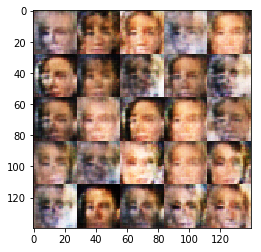

Epoch 1/1... Batch 3810... Discriminator Loss: 1.4212... Generator Loss: 0.8072
Epoch 1/1... Batch 3820... Discriminator Loss: 1.4711... Generator Loss: 0.6991
Epoch 1/1... Batch 3830... Discriminator Loss: 1.4123... Generator Loss: 0.7383
Epoch 1/1... Batch 3840... Discriminator Loss: 1.4148... Generator Loss: 0.7378
Epoch 1/1... Batch 3850... Discriminator Loss: 1.4266... Generator Loss: 0.7238
Epoch 1/1... Batch 3860... Discriminator Loss: 1.4286... Generator Loss: 0.7968
Epoch 1/1... Batch 3870... Discriminator Loss: 1.4274... Generator Loss: 0.7479
Epoch 1/1... Batch 3880... Discriminator Loss: 1.3943... Generator Loss: 0.7752
Epoch 1/1... Batch 3890... Discriminator Loss: 1.3869... Generator Loss: 0.7900
Epoch 1/1... Batch 3900... Discriminator Loss: 1.4013... Generator Loss: 0.7887


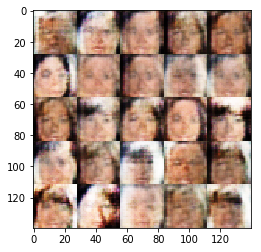

Epoch 1/1... Batch 3910... Discriminator Loss: 1.3978... Generator Loss: 0.8187
Epoch 1/1... Batch 3920... Discriminator Loss: 1.3955... Generator Loss: 0.8521
Epoch 1/1... Batch 3930... Discriminator Loss: 1.4306... Generator Loss: 0.7938
Epoch 1/1... Batch 3940... Discriminator Loss: 1.4252... Generator Loss: 0.7399
Epoch 1/1... Batch 3950... Discriminator Loss: 1.3961... Generator Loss: 0.7680
Epoch 1/1... Batch 3960... Discriminator Loss: 1.3898... Generator Loss: 0.7273
Epoch 1/1... Batch 3970... Discriminator Loss: 1.4154... Generator Loss: 0.7425
Epoch 1/1... Batch 3980... Discriminator Loss: 1.4047... Generator Loss: 0.7770
Epoch 1/1... Batch 3990... Discriminator Loss: 1.4267... Generator Loss: 0.7694
Epoch 1/1... Batch 4000... Discriminator Loss: 1.4196... Generator Loss: 0.7157


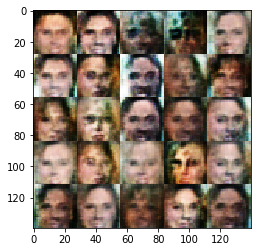

Epoch 1/1... Batch 4010... Discriminator Loss: 1.4018... Generator Loss: 0.7605
Epoch 1/1... Batch 4020... Discriminator Loss: 1.4139... Generator Loss: 0.7766
Epoch 1/1... Batch 4030... Discriminator Loss: 1.3920... Generator Loss: 0.7710
Epoch 1/1... Batch 4040... Discriminator Loss: 1.4237... Generator Loss: 0.7630
Epoch 1/1... Batch 4050... Discriminator Loss: 1.4369... Generator Loss: 0.7453
Epoch 1/1... Batch 4060... Discriminator Loss: 1.3955... Generator Loss: 0.7469
Epoch 1/1... Batch 4070... Discriminator Loss: 1.4188... Generator Loss: 0.7596
Epoch 1/1... Batch 4080... Discriminator Loss: 1.3998... Generator Loss: 0.8200
Epoch 1/1... Batch 4090... Discriminator Loss: 1.3993... Generator Loss: 0.7768
Epoch 1/1... Batch 4100... Discriminator Loss: 1.4116... Generator Loss: 0.7628


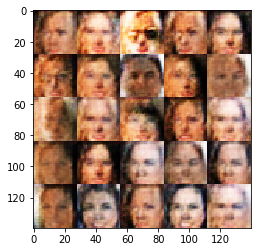

Epoch 1/1... Batch 4110... Discriminator Loss: 1.4225... Generator Loss: 0.7701
Epoch 1/1... Batch 4120... Discriminator Loss: 1.3972... Generator Loss: 0.7630
Epoch 1/1... Batch 4130... Discriminator Loss: 1.4124... Generator Loss: 0.8106
Epoch 1/1... Batch 4140... Discriminator Loss: 1.4174... Generator Loss: 0.7326
Epoch 1/1... Batch 4150... Discriminator Loss: 1.4050... Generator Loss: 0.7674
Epoch 1/1... Batch 4160... Discriminator Loss: 1.4438... Generator Loss: 0.7848
Epoch 1/1... Batch 4170... Discriminator Loss: 1.4329... Generator Loss: 0.7398
Epoch 1/1... Batch 4180... Discriminator Loss: 1.4008... Generator Loss: 0.8000
Epoch 1/1... Batch 4190... Discriminator Loss: 1.4050... Generator Loss: 0.7637
Epoch 1/1... Batch 4200... Discriminator Loss: 1.4311... Generator Loss: 0.7361


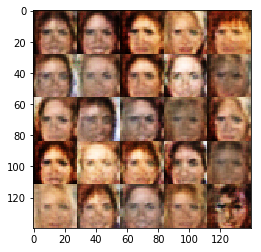

Epoch 1/1... Batch 4210... Discriminator Loss: 1.3869... Generator Loss: 0.7524
Epoch 1/1... Batch 4220... Discriminator Loss: 1.4544... Generator Loss: 0.6991
Epoch 1/1... Batch 4230... Discriminator Loss: 1.3981... Generator Loss: 0.7411
Epoch 1/1... Batch 4240... Discriminator Loss: 1.4398... Generator Loss: 0.7429
Epoch 1/1... Batch 4250... Discriminator Loss: 1.4251... Generator Loss: 0.8477
Epoch 1/1... Batch 4260... Discriminator Loss: 1.4235... Generator Loss: 0.7781
Epoch 1/1... Batch 4270... Discriminator Loss: 1.4283... Generator Loss: 0.7469
Epoch 1/1... Batch 4280... Discriminator Loss: 1.3813... Generator Loss: 0.8043
Epoch 1/1... Batch 4290... Discriminator Loss: 1.4317... Generator Loss: 0.7225
Epoch 1/1... Batch 4300... Discriminator Loss: 1.4327... Generator Loss: 0.7206


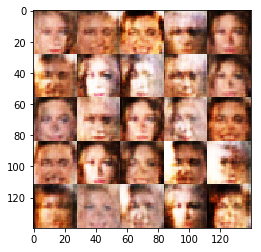

Epoch 1/1... Batch 4310... Discriminator Loss: 1.4015... Generator Loss: 0.7441
Epoch 1/1... Batch 4320... Discriminator Loss: 1.4427... Generator Loss: 0.7401
Epoch 1/1... Batch 4330... Discriminator Loss: 1.4354... Generator Loss: 0.7581
Epoch 1/1... Batch 4340... Discriminator Loss: 1.3747... Generator Loss: 0.8000
Epoch 1/1... Batch 4350... Discriminator Loss: 1.3930... Generator Loss: 0.7526
Epoch 1/1... Batch 4360... Discriminator Loss: 1.4006... Generator Loss: 0.8234
Epoch 1/1... Batch 4370... Discriminator Loss: 1.4420... Generator Loss: 0.7013
Epoch 1/1... Batch 4380... Discriminator Loss: 1.4363... Generator Loss: 0.7830
Epoch 1/1... Batch 4390... Discriminator Loss: 1.4359... Generator Loss: 0.7389
Epoch 1/1... Batch 4400... Discriminator Loss: 1.4044... Generator Loss: 0.7560


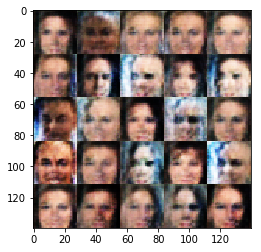

Epoch 1/1... Batch 4410... Discriminator Loss: 1.4231... Generator Loss: 0.7603
Epoch 1/1... Batch 4420... Discriminator Loss: 1.4199... Generator Loss: 0.7741
Epoch 1/1... Batch 4430... Discriminator Loss: 1.4181... Generator Loss: 0.7791
Epoch 1/1... Batch 4440... Discriminator Loss: 1.4372... Generator Loss: 0.7127
Epoch 1/1... Batch 4450... Discriminator Loss: 1.4036... Generator Loss: 0.8187
Epoch 1/1... Batch 4460... Discriminator Loss: 1.4156... Generator Loss: 0.7882
Epoch 1/1... Batch 4470... Discriminator Loss: 1.4090... Generator Loss: 0.8079
Epoch 1/1... Batch 4480... Discriminator Loss: 1.3900... Generator Loss: 0.7474
Epoch 1/1... Batch 4490... Discriminator Loss: 1.3883... Generator Loss: 0.8484
Epoch 1/1... Batch 4500... Discriminator Loss: 1.3778... Generator Loss: 0.8032


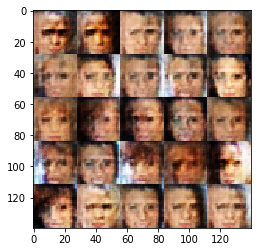

Epoch 1/1... Batch 4510... Discriminator Loss: 1.4103... Generator Loss: 0.7710
Epoch 1/1... Batch 4520... Discriminator Loss: 1.4060... Generator Loss: 0.7647
Epoch 1/1... Batch 4530... Discriminator Loss: 1.3987... Generator Loss: 0.7817
Epoch 1/1... Batch 4540... Discriminator Loss: 1.3942... Generator Loss: 0.7897
Epoch 1/1... Batch 4550... Discriminator Loss: 1.4217... Generator Loss: 0.8135
Epoch 1/1... Batch 4560... Discriminator Loss: 1.4177... Generator Loss: 0.7264
Epoch 1/1... Batch 4570... Discriminator Loss: 1.3898... Generator Loss: 0.7909
Epoch 1/1... Batch 4580... Discriminator Loss: 1.4167... Generator Loss: 0.7718
Epoch 1/1... Batch 4590... Discriminator Loss: 1.4277... Generator Loss: 0.7749
Epoch 1/1... Batch 4600... Discriminator Loss: 1.4378... Generator Loss: 0.7992


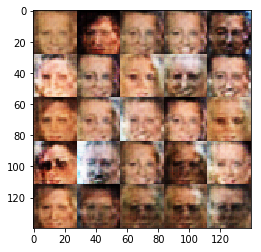

Epoch 1/1... Batch 4610... Discriminator Loss: 1.3939... Generator Loss: 0.7778
Epoch 1/1... Batch 4620... Discriminator Loss: 1.4290... Generator Loss: 0.7515
Epoch 1/1... Batch 4630... Discriminator Loss: 1.4502... Generator Loss: 0.6726
Epoch 1/1... Batch 4640... Discriminator Loss: 1.3830... Generator Loss: 0.7899
Epoch 1/1... Batch 4650... Discriminator Loss: 1.4266... Generator Loss: 0.7909
Epoch 1/1... Batch 4660... Discriminator Loss: 1.3934... Generator Loss: 0.7899
Epoch 1/1... Batch 4670... Discriminator Loss: 1.3871... Generator Loss: 0.8113
Epoch 1/1... Batch 4680... Discriminator Loss: 1.3750... Generator Loss: 0.7761
Epoch 1/1... Batch 4690... Discriminator Loss: 1.4071... Generator Loss: 0.7349
Epoch 1/1... Batch 4700... Discriminator Loss: 1.4096... Generator Loss: 0.8469


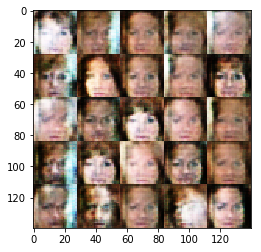

Epoch 1/1... Batch 4710... Discriminator Loss: 1.3846... Generator Loss: 0.7773
Epoch 1/1... Batch 4720... Discriminator Loss: 1.4631... Generator Loss: 0.7242
Epoch 1/1... Batch 4730... Discriminator Loss: 1.3961... Generator Loss: 0.7773
Epoch 1/1... Batch 4740... Discriminator Loss: 1.4313... Generator Loss: 0.7279
Epoch 1/1... Batch 4750... Discriminator Loss: 1.4103... Generator Loss: 0.7776
Epoch 1/1... Batch 4760... Discriminator Loss: 1.4183... Generator Loss: 0.7538
Epoch 1/1... Batch 4770... Discriminator Loss: 1.4116... Generator Loss: 0.7669
Epoch 1/1... Batch 4780... Discriminator Loss: 1.3935... Generator Loss: 0.7838
Epoch 1/1... Batch 4790... Discriminator Loss: 1.3893... Generator Loss: 0.7915
Epoch 1/1... Batch 4800... Discriminator Loss: 1.4182... Generator Loss: 0.7831


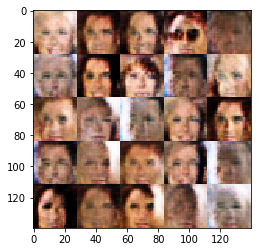

Epoch 1/1... Batch 4810... Discriminator Loss: 1.3946... Generator Loss: 0.8136
Epoch 1/1... Batch 4820... Discriminator Loss: 1.4095... Generator Loss: 0.7659
Epoch 1/1... Batch 4830... Discriminator Loss: 1.4140... Generator Loss: 0.7540
Epoch 1/1... Batch 4840... Discriminator Loss: 1.4166... Generator Loss: 0.7793
Epoch 1/1... Batch 4850... Discriminator Loss: 1.4306... Generator Loss: 0.7806
Epoch 1/1... Batch 4860... Discriminator Loss: 1.4075... Generator Loss: 0.8150
Epoch 1/1... Batch 4870... Discriminator Loss: 1.4103... Generator Loss: 0.7437
Epoch 1/1... Batch 4880... Discriminator Loss: 1.4250... Generator Loss: 0.7473
Epoch 1/1... Batch 4890... Discriminator Loss: 1.4286... Generator Loss: 0.7403
Epoch 1/1... Batch 4900... Discriminator Loss: 1.4165... Generator Loss: 0.7770


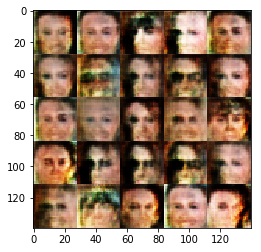

Epoch 1/1... Batch 4910... Discriminator Loss: 1.4130... Generator Loss: 0.7552
Epoch 1/1... Batch 4920... Discriminator Loss: 1.3951... Generator Loss: 0.7656
Epoch 1/1... Batch 4930... Discriminator Loss: 1.4306... Generator Loss: 0.7925
Epoch 1/1... Batch 4940... Discriminator Loss: 1.4365... Generator Loss: 0.7934
Epoch 1/1... Batch 4950... Discriminator Loss: 1.3918... Generator Loss: 0.8015
Epoch 1/1... Batch 4960... Discriminator Loss: 1.4091... Generator Loss: 0.7879
Epoch 1/1... Batch 4970... Discriminator Loss: 1.3939... Generator Loss: 0.8293
Epoch 1/1... Batch 4980... Discriminator Loss: 1.3924... Generator Loss: 0.8166
Epoch 1/1... Batch 4990... Discriminator Loss: 1.4178... Generator Loss: 0.7657
Epoch 1/1... Batch 5000... Discriminator Loss: 1.4011... Generator Loss: 0.7833


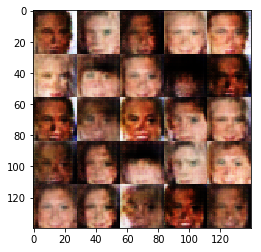

Epoch 1/1... Batch 5010... Discriminator Loss: 1.3854... Generator Loss: 0.7691
Epoch 1/1... Batch 5020... Discriminator Loss: 1.4149... Generator Loss: 0.7495
Epoch 1/1... Batch 5030... Discriminator Loss: 1.4252... Generator Loss: 0.6989
Epoch 1/1... Batch 5040... Discriminator Loss: 1.4080... Generator Loss: 0.7856
Epoch 1/1... Batch 5050... Discriminator Loss: 1.4120... Generator Loss: 0.7621
Epoch 1/1... Batch 5060... Discriminator Loss: 1.3578... Generator Loss: 0.8359
Epoch 1/1... Batch 5070... Discriminator Loss: 1.4126... Generator Loss: 0.7504
Epoch 1/1... Batch 5080... Discriminator Loss: 1.4279... Generator Loss: 0.7811
Epoch 1/1... Batch 5090... Discriminator Loss: 1.4195... Generator Loss: 0.7788
Epoch 1/1... Batch 5100... Discriminator Loss: 1.3998... Generator Loss: 0.8027


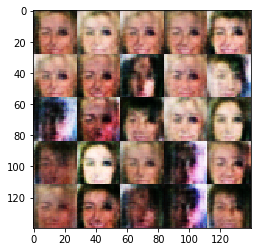

Epoch 1/1... Batch 5110... Discriminator Loss: 1.4019... Generator Loss: 0.7969
Epoch 1/1... Batch 5120... Discriminator Loss: 1.3942... Generator Loss: 0.8073
Epoch 1/1... Batch 5130... Discriminator Loss: 1.4040... Generator Loss: 0.7923
Epoch 1/1... Batch 5140... Discriminator Loss: 1.4472... Generator Loss: 0.7294
Epoch 1/1... Batch 5150... Discriminator Loss: 1.3972... Generator Loss: 0.7752
Epoch 1/1... Batch 5160... Discriminator Loss: 1.4059... Generator Loss: 0.7871
Epoch 1/1... Batch 5170... Discriminator Loss: 1.4030... Generator Loss: 0.7616
Epoch 1/1... Batch 5180... Discriminator Loss: 1.3930... Generator Loss: 0.8059
Epoch 1/1... Batch 5190... Discriminator Loss: 1.4118... Generator Loss: 0.6984
Epoch 1/1... Batch 5200... Discriminator Loss: 1.4088... Generator Loss: 0.7869


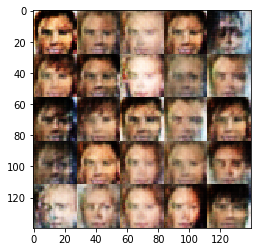

Epoch 1/1... Batch 5210... Discriminator Loss: 1.4259... Generator Loss: 0.7587
Epoch 1/1... Batch 5220... Discriminator Loss: 1.3812... Generator Loss: 0.8034
Epoch 1/1... Batch 5230... Discriminator Loss: 1.4254... Generator Loss: 0.8041
Epoch 1/1... Batch 5240... Discriminator Loss: 1.4212... Generator Loss: 0.7964
Epoch 1/1... Batch 5250... Discriminator Loss: 1.3926... Generator Loss: 0.7855
Epoch 1/1... Batch 5260... Discriminator Loss: 1.3912... Generator Loss: 0.7254
Epoch 1/1... Batch 5270... Discriminator Loss: 1.4227... Generator Loss: 0.7486
Epoch 1/1... Batch 5280... Discriminator Loss: 1.3804... Generator Loss: 0.7583
Epoch 1/1... Batch 5290... Discriminator Loss: 1.4082... Generator Loss: 0.7729
Epoch 1/1... Batch 5300... Discriminator Loss: 1.4148... Generator Loss: 0.7826


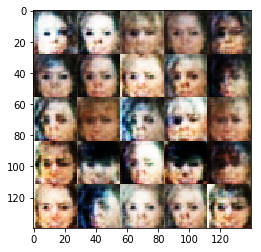

Epoch 1/1... Batch 5310... Discriminator Loss: 1.4716... Generator Loss: 0.8747
Epoch 1/1... Batch 5320... Discriminator Loss: 1.4155... Generator Loss: 0.7523
Epoch 1/1... Batch 5330... Discriminator Loss: 1.4286... Generator Loss: 0.7348
Epoch 1/1... Batch 5340... Discriminator Loss: 1.3994... Generator Loss: 0.7866
Epoch 1/1... Batch 5350... Discriminator Loss: 1.4321... Generator Loss: 0.7349
Epoch 1/1... Batch 5360... Discriminator Loss: 1.4312... Generator Loss: 0.7377
Epoch 1/1... Batch 5370... Discriminator Loss: 1.4083... Generator Loss: 0.7576
Epoch 1/1... Batch 5380... Discriminator Loss: 1.4308... Generator Loss: 0.7231
Epoch 1/1... Batch 5390... Discriminator Loss: 1.4230... Generator Loss: 0.7452
Epoch 1/1... Batch 5400... Discriminator Loss: 1.3924... Generator Loss: 0.7649


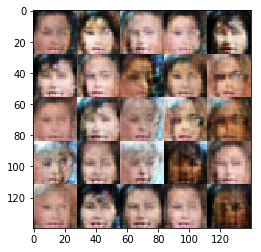

Epoch 1/1... Batch 5410... Discriminator Loss: 1.4159... Generator Loss: 0.7803
Epoch 1/1... Batch 5420... Discriminator Loss: 1.3824... Generator Loss: 0.7823
Epoch 1/1... Batch 5430... Discriminator Loss: 1.4123... Generator Loss: 0.7647
Epoch 1/1... Batch 5440... Discriminator Loss: 1.4039... Generator Loss: 0.7760
Epoch 1/1... Batch 5450... Discriminator Loss: 1.4547... Generator Loss: 0.7781
Epoch 1/1... Batch 5460... Discriminator Loss: 1.4067... Generator Loss: 0.8272
Epoch 1/1... Batch 5470... Discriminator Loss: 1.4058... Generator Loss: 0.8084
Epoch 1/1... Batch 5480... Discriminator Loss: 1.4582... Generator Loss: 0.7465
Epoch 1/1... Batch 5490... Discriminator Loss: 1.4177... Generator Loss: 0.7531
Epoch 1/1... Batch 5500... Discriminator Loss: 1.4425... Generator Loss: 0.7703


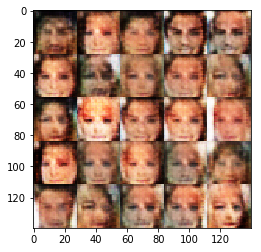

Epoch 1/1... Batch 5510... Discriminator Loss: 1.4016... Generator Loss: 0.7994
Epoch 1/1... Batch 5520... Discriminator Loss: 1.4094... Generator Loss: 0.7900
Epoch 1/1... Batch 5530... Discriminator Loss: 1.4326... Generator Loss: 0.7152
Epoch 1/1... Batch 5540... Discriminator Loss: 1.4390... Generator Loss: 0.7224
Epoch 1/1... Batch 5550... Discriminator Loss: 1.3921... Generator Loss: 0.7977
Epoch 1/1... Batch 5560... Discriminator Loss: 1.3708... Generator Loss: 0.8055
Epoch 1/1... Batch 5570... Discriminator Loss: 1.3967... Generator Loss: 0.7420
Epoch 1/1... Batch 5580... Discriminator Loss: 1.3989... Generator Loss: 0.7736
Epoch 1/1... Batch 5590... Discriminator Loss: 1.4169... Generator Loss: 0.7628
Epoch 1/1... Batch 5600... Discriminator Loss: 1.4089... Generator Loss: 0.7752


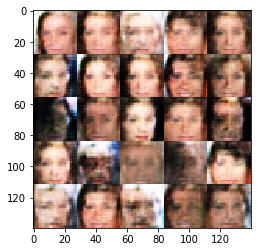

Epoch 1/1... Batch 5610... Discriminator Loss: 1.4126... Generator Loss: 0.7905
Epoch 1/1... Batch 5620... Discriminator Loss: 1.4220... Generator Loss: 0.7263
Epoch 1/1... Batch 5630... Discriminator Loss: 1.4126... Generator Loss: 0.7959
Epoch 1/1... Batch 5640... Discriminator Loss: 1.3902... Generator Loss: 0.8649
Epoch 1/1... Batch 5650... Discriminator Loss: 1.4222... Generator Loss: 0.7857
Epoch 1/1... Batch 5660... Discriminator Loss: 1.3923... Generator Loss: 0.8013
Epoch 1/1... Batch 5670... Discriminator Loss: 1.3899... Generator Loss: 0.7657
Epoch 1/1... Batch 5680... Discriminator Loss: 1.3940... Generator Loss: 0.7911
Epoch 1/1... Batch 5690... Discriminator Loss: 1.3964... Generator Loss: 0.7651
Epoch 1/1... Batch 5700... Discriminator Loss: 1.4120... Generator Loss: 0.7574


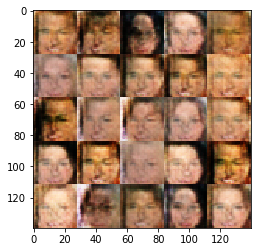

Epoch 1/1... Batch 5710... Discriminator Loss: 1.4117... Generator Loss: 0.7462
Epoch 1/1... Batch 5720... Discriminator Loss: 1.4278... Generator Loss: 0.7419
Epoch 1/1... Batch 5730... Discriminator Loss: 1.4032... Generator Loss: 0.7924
Epoch 1/1... Batch 5740... Discriminator Loss: 1.4043... Generator Loss: 0.7826
Epoch 1/1... Batch 5750... Discriminator Loss: 1.4180... Generator Loss: 0.7630
Epoch 1/1... Batch 5760... Discriminator Loss: 1.3905... Generator Loss: 0.7580
Epoch 1/1... Batch 5770... Discriminator Loss: 1.4168... Generator Loss: 0.7668
Epoch 1/1... Batch 5780... Discriminator Loss: 1.4353... Generator Loss: 0.7496
Epoch 1/1... Batch 5790... Discriminator Loss: 1.3916... Generator Loss: 0.8042
Epoch 1/1... Batch 5800... Discriminator Loss: 1.4068... Generator Loss: 0.7901


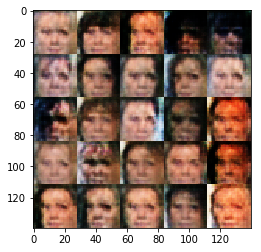

Epoch 1/1... Batch 5810... Discriminator Loss: 1.4335... Generator Loss: 0.7685
Epoch 1/1... Batch 5820... Discriminator Loss: 1.4086... Generator Loss: 0.7609
Epoch 1/1... Batch 5830... Discriminator Loss: 1.3953... Generator Loss: 0.7541
Epoch 1/1... Batch 5840... Discriminator Loss: 1.4080... Generator Loss: 0.7795
Epoch 1/1... Batch 5850... Discriminator Loss: 1.3892... Generator Loss: 0.7498
Epoch 1/1... Batch 5860... Discriminator Loss: 1.4112... Generator Loss: 0.7400
Epoch 1/1... Batch 5870... Discriminator Loss: 1.3899... Generator Loss: 0.7961
Epoch 1/1... Batch 5880... Discriminator Loss: 1.3846... Generator Loss: 0.7996
Epoch 1/1... Batch 5890... Discriminator Loss: 1.4288... Generator Loss: 0.7838
Epoch 1/1... Batch 5900... Discriminator Loss: 1.4155... Generator Loss: 0.7702


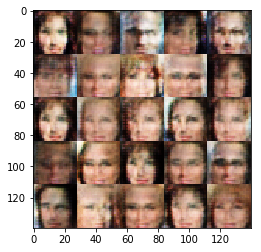

Epoch 1/1... Batch 5910... Discriminator Loss: 1.3893... Generator Loss: 0.7445
Epoch 1/1... Batch 5920... Discriminator Loss: 1.3986... Generator Loss: 0.8059
Epoch 1/1... Batch 5930... Discriminator Loss: 1.4045... Generator Loss: 0.7562
Epoch 1/1... Batch 5940... Discriminator Loss: 1.3862... Generator Loss: 0.7875
Epoch 1/1... Batch 5950... Discriminator Loss: 1.4122... Generator Loss: 0.7432
Epoch 1/1... Batch 5960... Discriminator Loss: 1.4318... Generator Loss: 0.7521
Epoch 1/1... Batch 5970... Discriminator Loss: 1.3916... Generator Loss: 0.7736
Epoch 1/1... Batch 5980... Discriminator Loss: 1.4232... Generator Loss: 0.7720
Epoch 1/1... Batch 5990... Discriminator Loss: 1.4036... Generator Loss: 0.7746
Epoch 1/1... Batch 6000... Discriminator Loss: 1.4095... Generator Loss: 0.7784


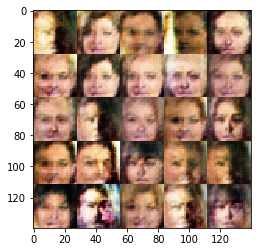

Epoch 1/1... Batch 6010... Discriminator Loss: 1.4163... Generator Loss: 0.7212
Epoch 1/1... Batch 6020... Discriminator Loss: 1.4107... Generator Loss: 0.7385
Epoch 1/1... Batch 6030... Discriminator Loss: 1.3932... Generator Loss: 0.7512
Epoch 1/1... Batch 6040... Discriminator Loss: 1.3981... Generator Loss: 0.8110
Epoch 1/1... Batch 6050... Discriminator Loss: 1.3786... Generator Loss: 0.7652
Epoch 1/1... Batch 6060... Discriminator Loss: 1.3927... Generator Loss: 0.7868
Epoch 1/1... Batch 6070... Discriminator Loss: 1.4250... Generator Loss: 0.7235
Epoch 1/1... Batch 6080... Discriminator Loss: 1.4541... Generator Loss: 0.7178
Epoch 1/1... Batch 6090... Discriminator Loss: 1.4004... Generator Loss: 0.7535
Epoch 1/1... Batch 6100... Discriminator Loss: 1.4106... Generator Loss: 0.7660


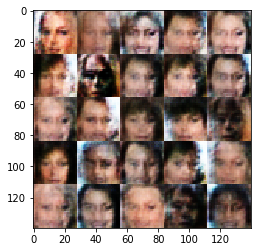

Epoch 1/1... Batch 6110... Discriminator Loss: 1.4119... Generator Loss: 0.8268
Epoch 1/1... Batch 6120... Discriminator Loss: 1.3842... Generator Loss: 0.7984
Epoch 1/1... Batch 6130... Discriminator Loss: 1.4201... Generator Loss: 0.7735
Epoch 1/1... Batch 6140... Discriminator Loss: 1.4316... Generator Loss: 0.7680
Epoch 1/1... Batch 6150... Discriminator Loss: 1.3906... Generator Loss: 0.7334
Epoch 1/1... Batch 6160... Discriminator Loss: 1.3986... Generator Loss: 0.7519
Epoch 1/1... Batch 6170... Discriminator Loss: 1.4023... Generator Loss: 0.7867
Epoch 1/1... Batch 6180... Discriminator Loss: 1.3985... Generator Loss: 0.7759
Epoch 1/1... Batch 6190... Discriminator Loss: 1.3911... Generator Loss: 0.7451
Epoch 1/1... Batch 6200... Discriminator Loss: 1.3975... Generator Loss: 0.7427


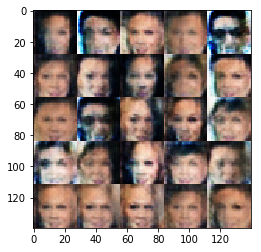

Epoch 1/1... Batch 6210... Discriminator Loss: 1.3892... Generator Loss: 0.7770
Epoch 1/1... Batch 6220... Discriminator Loss: 1.4216... Generator Loss: 0.7612
Epoch 1/1... Batch 6230... Discriminator Loss: 1.3838... Generator Loss: 0.7438
Epoch 1/1... Batch 6240... Discriminator Loss: 1.4132... Generator Loss: 0.7569
Epoch 1/1... Batch 6250... Discriminator Loss: 1.3939... Generator Loss: 0.7634
Epoch 1/1... Batch 6260... Discriminator Loss: 1.3925... Generator Loss: 0.7462
Epoch 1/1... Batch 6270... Discriminator Loss: 1.3986... Generator Loss: 0.7671
Epoch 1/1... Batch 6280... Discriminator Loss: 1.4105... Generator Loss: 0.7542
Epoch 1/1... Batch 6290... Discriminator Loss: 1.4236... Generator Loss: 0.8033
Epoch 1/1... Batch 6300... Discriminator Loss: 1.4156... Generator Loss: 0.7919


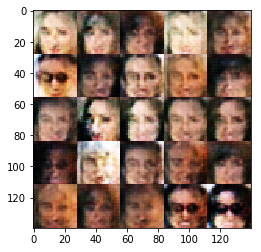

Epoch 1/1... Batch 6310... Discriminator Loss: 1.4058... Generator Loss: 0.7802
Epoch 1/1... Batch 6320... Discriminator Loss: 1.3978... Generator Loss: 0.7684
Epoch 1/1... Batch 6330... Discriminator Loss: 1.4065... Generator Loss: 0.7641


In [44]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.